Required Libraries

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas setting
pd.set_option('display.max_columns', 50)

np.set_printoptions(threshold=20)

echo "# Credit-Scoring-Project" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/christrihardy/Credit-Scoring-Project.git
git push -u origin main

### 1. Data Preparation

#### 1.1. Load Data

In [2]:
# Load csv
data = pd.read_csv("credit-german.csv")

# Preview data
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [3]:
data.shape

(1000, 21)

- Some variables are already binned (ex: employment and checking status)
- There are 21 total variables

Define response variable/target

In [4]:
# Define response variable
response_variable = 'class'

# Check the proportion of response variable
data[response_variable].value_counts(normalize = True)

good    0.7
bad     0.3
Name: class, dtype: float64

Class is the response variable (Good or Bad credit risks)

#### 1.2. Data Validation

In [5]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

There are:
- 7 numerical variables
- 14 categorical variables

#### 1.3. Sample Splitting

Split predictor and target variable

In [6]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns = [response_variable],
              axis = 1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (1000,)
X shape : (1000, 20)


Split Train and Test set

In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (700, 20)
y train shape : (700,)
X test shape  : (300, 20)
y test shape  : (300,)


Check proportion of response variable

In [8]:
y_train.value_counts(normalize = True)

good    0.7
bad     0.3
Name: class, dtype: float64

In [9]:
y_test.value_counts(normalize = True)

good    0.7
bad     0.3
Name: class, dtype: float64

### 2. EDA

Merge X and Y in train data for EDA purposes

In [10]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train),
                       axis = 1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head()

Train data shape: (700, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
328,>=200,36,existing paid,radio/tv,4473,<100,>=7,4,male single,none,2,car,31,none,own,1,skilled,1,none,yes,good
891,no checking,15,critical/other existing credit,radio/tv,1829,<100,>=7,4,male single,none,4,car,46,none,own,2,skilled,1,yes,yes,good
255,0<=X<200,60,delayed previously,radio/tv,7418,no known savings,1<=X<4,1,male single,none,1,real estate,27,none,own,1,unskilled resident,1,none,yes,good
243,no checking,12,critical/other existing credit,business,1185,<100,1<=X<4,3,female div/dep/mar,none,2,real estate,27,none,own,2,skilled,1,none,yes,good
492,no checking,6,critical/other existing credit,radio/tv,1237,100<=X<500,1<=X<4,1,female div/dep/mar,none,1,life insurance,27,none,own,2,skilled,1,none,yes,good


#### 2.1. Check missing values

In [11]:
# Check for missing values
data_train.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

No missing values in this dataset

In [12]:
# Check for data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         700 non-null    object
 1   duration                700 non-null    int64 
 2   credit_history          700 non-null    object
 3   purpose                 700 non-null    object
 4   credit_amount           700 non-null    int64 
 5   savings_status          700 non-null    object
 6   employment              700 non-null    object
 7   installment_commitment  700 non-null    int64 
 8   personal_status         700 non-null    object
 9   other_parties           700 non-null    object
 10  residence_since         700 non-null    int64 
 11  property_magnitude      700 non-null    object
 12  age                     700 non-null    int64 
 13  other_payment_plans     700 non-null    object
 14  housing                 700 non-null    object
 15  exis

All data types valid, and each columns only contains 1 data type

#### 2.2. Numerical Predictor Distribution

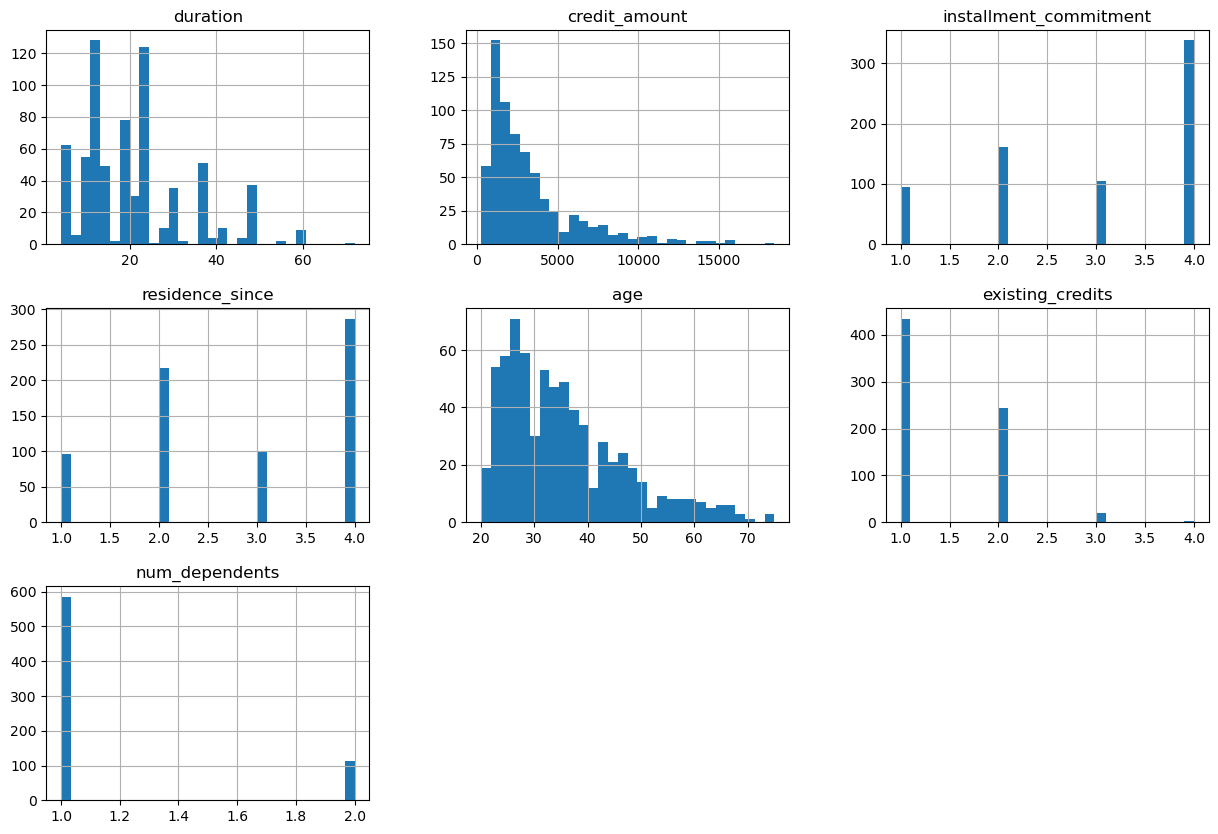

In [13]:
# Distribution in each numerical variables
data_train.hist(bins=30, figsize=(15, 10))
plt.show()

- `installment commitment, residence since, existing credits,num_dependents` will be converted to categorical because the values have very small range (1 to 4)


#### 2.3. Age

In [14]:
# Credit class by Age
data_train["age"].groupby(data_train["class"]).describe().round(0)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bad,210.0,34.0,11.0,20.0,25.0,30.0,39.0,68.0
good,490.0,36.0,11.0,20.0,27.0,34.0,42.0,75.0


<AxesSubplot:xlabel='class', ylabel='age'>

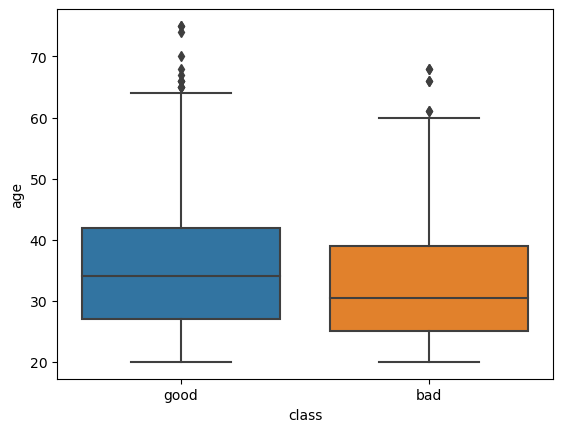

In [15]:
# Boxplot of age by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'age')

- Average age of Bad class is 34
- Youngest age is 20 -> Check regulations
- Age > 60 will be grouped as outliers

#### 2.4. Existing credits

In [16]:
# Credit class by Age
data_train["existing_credits"].groupby(data_train["class"]).describe().round(0)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bad,210.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0
good,490.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0


<AxesSubplot:xlabel='class', ylabel='existing_credits'>

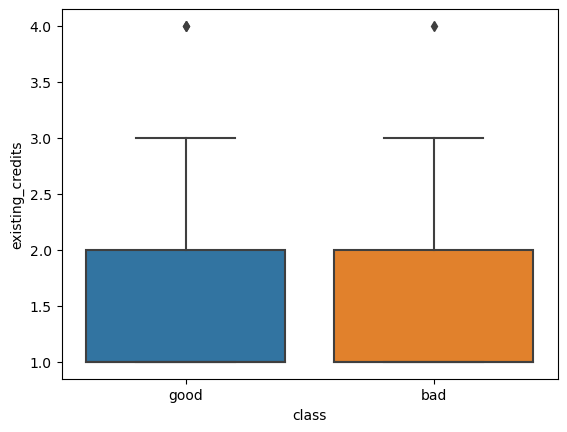

In [17]:
# Boxplot of age by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'existing_credits')

<AxesSubplot:xlabel='existing_credits', ylabel='count'>

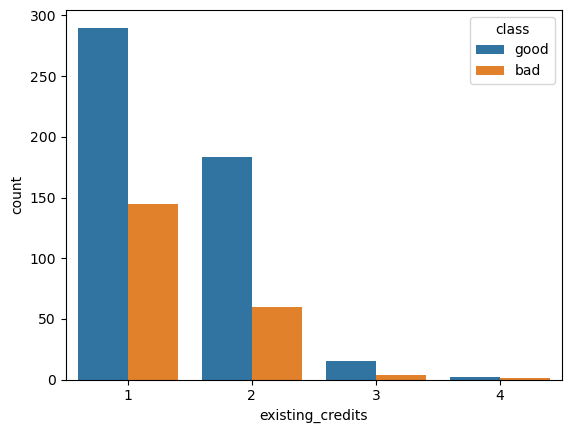

In [18]:
# Describe proportion of good/bad by 'existing credits'
sns.countplot(data = data_train,
              x = 'existing_credits',
              hue = response_variable)

- All debtors have min. 1 existing credits at this bank
- Good and Bad classes have the same mean and median 


#### 2.5. Credit Amount

In [19]:
# Credit class by Age
data_train["credit_amount"].describe()

count      700.000000
mean      3236.121429
std       2809.268797
min        250.000000
25%       1336.000000
50%       2290.000000
75%       3965.250000
max      18424.000000
Name: credit_amount, dtype: float64

In [20]:
# Credit class by credit amount
data_train["credit_amount"].groupby(data_train["class"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bad,210.0,3932.75,3515.85,433.0,1291.00,2691.5,5135.0,18424.0
good,490.0,2937.57,2387.52,250.0,1360.25,2204.5,3605.5,15653.0


<AxesSubplot:xlabel='class', ylabel='credit_amount'>

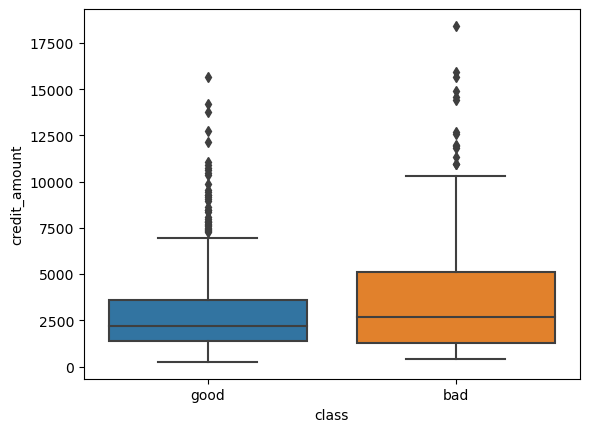

In [21]:
# Boxplot of credit amount by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'credit_amount')

- Median credit taken in bad class is slightly higher than good class

#### 2.6. Duration (Months)

In [22]:
# Credit class by credit amount
data_train["duration"].groupby(data_train["class"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bad,210.0,25.10,13.63,6.0,12.0,24.0,36.0,72.0
good,490.0,19.31,11.24,4.0,12.0,18.0,24.0,60.0


<AxesSubplot:xlabel='class', ylabel='duration'>

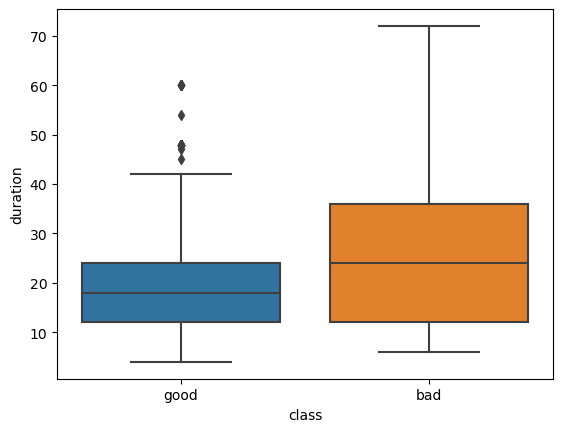

In [23]:
# Boxplot of credit amount by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'duration')

- Mean and median of "duration" in Bad class are higher than Good class

#### 2.7. Residence Since

In [24]:
# Credit class by credit amount
data_train["residence_since"].groupby(data_train["class"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bad,210.0,2.84,1.09,1.0,2.0,3.0,4.0,4.0
good,490.0,2.82,1.12,1.0,2.0,3.0,4.0,4.0


<AxesSubplot:xlabel='class', ylabel='residence_since'>

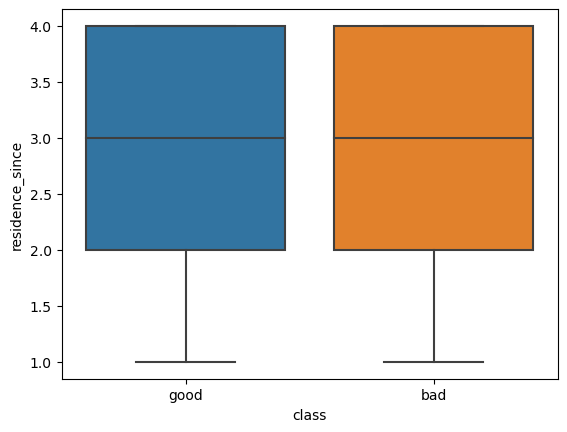

In [25]:
# Boxplot of credit amount by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'residence_since')

- Not much statistical difference between Good and Bad class

#### 2.8. Number of dependents

In [26]:
# Credit class by credit amount
data_train["num_dependents"].groupby(data_train["class"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bad,210.0,1.14,0.35,1.0,1.0,1.0,1.0,2.0
good,490.0,1.17,0.38,1.0,1.0,1.0,1.0,2.0


<AxesSubplot:xlabel='class', ylabel='num_dependents'>

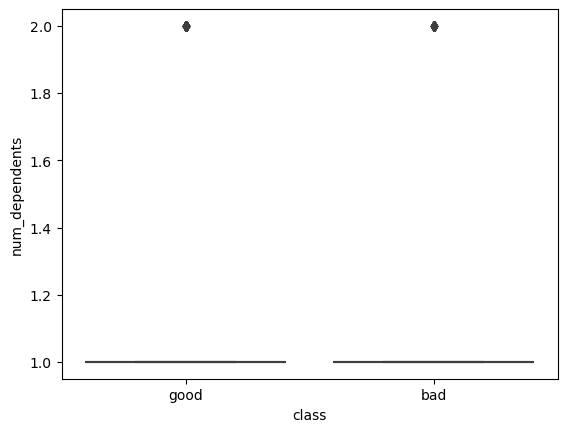

In [27]:
# Boxplot of credit amount by class
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'num_dependents')

- Debtors only have 1 or 2 dependents in this data

#### 2.9. Employment

In [28]:
# Describe proportion of 'employment'
data_train['employment'].value_counts(normalize = True)

1<=X<4        0.334286
>=7           0.258571
<1            0.181429
4<=X<7        0.170000
unemployed    0.055714
Name: employment, dtype: float64

<AxesSubplot:xlabel='employment', ylabel='count'>

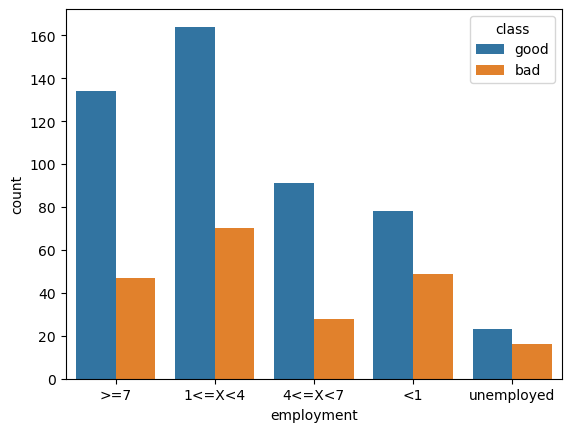

In [29]:
# Describe proportion of default by 'employment'
sns.countplot(data = data_train,
              x = 'employment',
              hue = response_variable)

- Bad class is the highest in  "1 to 4 years employment" category
- Surprisingly, "unemployed" has the least amount of Bad class but may be due to only 5% unemployed debtors in this dataset

#### 2.10. Credit History

In [30]:
# Describe proportion of 'employment'
data_train['credit_history'].value_counts(normalize = True)

existing paid                     0.531429
critical/other existing credit    0.305714
delayed previously                0.081429
no credits/all paid               0.041429
all paid                          0.040000
Name: credit_history, dtype: float64

<AxesSubplot:xlabel='count', ylabel='credit_history'>

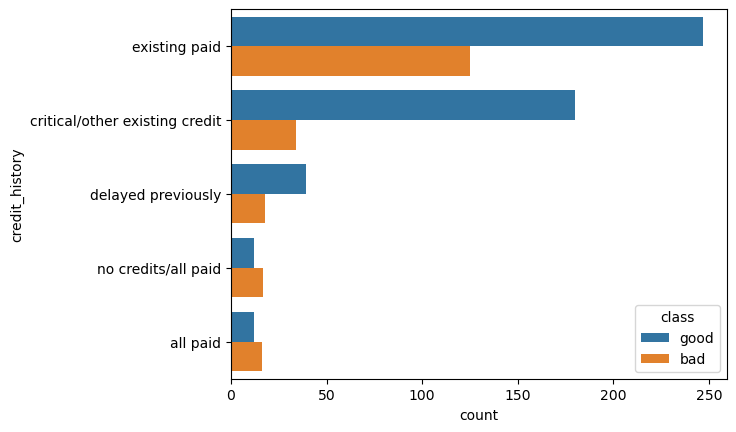

In [31]:
# Describe proportion of default by 'employment'
sns.countplot(data = data_train,
              y = 'credit_history',
              hue = response_variable,
             )

In [32]:
def calculate_odds(data, predictor_label):
  # Frequency of default by predictor_label
  crosstab = pd.crosstab(data[predictor_label],
                         data[response_variable],
                         margins = False)

  # Calculate odds
  crosstab['Odds'] = np.round((crosstab['bad']/crosstab['good']),2)

  # Sort by the odds value
  crosstab = crosstab.sort_values(by = 'Odds', ascending = False)

  return crosstab

In [33]:
# Calculate odds of default from predictor 'credit history'
odds_home = calculate_odds(data = data_train,
                           predictor_label = 'credit_history')

odds_home

class,bad,good,Odds
credit_history,,,
no credits/all paid,17,12,1.42
all paid,16,12,1.33
existing paid,125,247,0.51
delayed previously,18,39,0.46
critical/other existing credit,34,180,0.19


- Bad class debtors are mostly from "existing paid" credit history -> may be due to  half of the data is in "existing paid" category
- But the highest odds of Bad Class came from `no credits/all paid`

#### 2.11. Saving Status

<AxesSubplot:xlabel='count', ylabel='savings_status'>

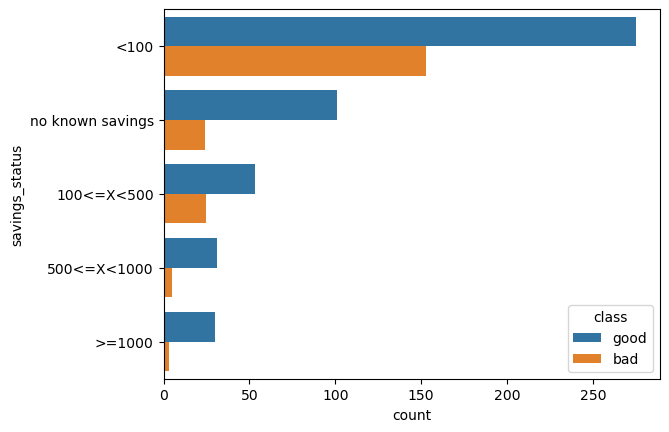

In [34]:
# Describe proportion of default by 'employment'
sns.countplot(data = data_train,
              y = 'savings_status',
              hue = response_variable)

- Highest Bad class debtors comes from "under 100" saving status

#### 2.12. Checking Status

<AxesSubplot:xlabel='count', ylabel='checking_status'>

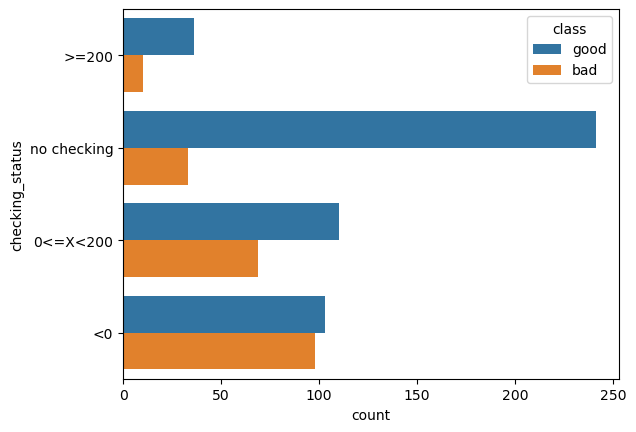

In [35]:
# Describe proportion of default by 'employment'
sns.countplot(data = data_train,
              y = 'checking_status',
              hue = response_variable)

- `<0` category doesn't make sense -> will be grouped into `missing`

#### 2.10. Check Correlation

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [37]:
# Define data with numerical predictors
num_columns = data_train.select_dtypes(include=['int64'])

In [38]:
# Define data with categorical predictors
cat_columns = data_train.select_dtypes(include=['object'])


In [39]:
# Calculate Pearson correlation coefficient from numerical predictors
data_train_corr = num_columns.corr(method = 'pearson')

data_train_corr

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.620570,0.071684,0.017872,-0.050008,-0.009235,-0.013719
credit_amount,0.620570,1.000000,-0.255613,0.008365,0.004699,0.016033,0.025388
installment_commitment,0.071684,-0.255613,1.000000,0.071644,0.060415,0.019742,-0.109473
residence_since,0.017872,0.008365,0.071644,1.000000,0.284099,0.078072,0.048221
age,-0.050008,0.004699,0.060415,0.284099,1.000000,0.141963,0.131577
existing_credits,-0.009235,0.016033,0.019742,0.078072,0.141963,1.000000,0.134669
num_dependents,-0.013719,0.025388,-0.109473,0.048221,0.131577,0.134669,1.000000


<AxesSubplot:>

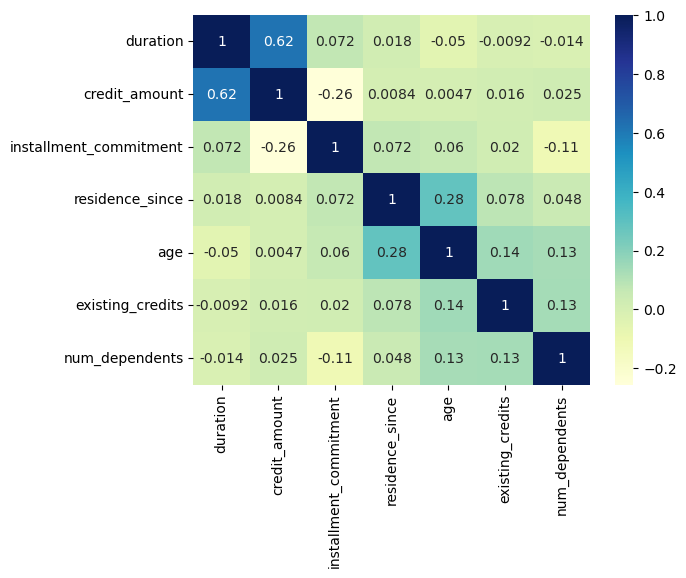

In [40]:
# Plot the heatmap correlation
sns.heatmap(data = data_train_corr,
            cmap = "YlGnBu",
            annot = True)

No multicollinearity among the numerical predictos

### 3. Initial Characteristic Analysis

- Group `<0` category in checking_status to `no checking`
- Some numerical variables like `num_dependents` can't be binned because of small range of values -> convert to category instead
- Bin the rest of the numerical variables

#### 3.1. Convert to categorical

In [41]:
num_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   duration                700 non-null    int64
 1   credit_amount           700 non-null    int64
 2   installment_commitment  700 non-null    int64
 3   residence_since         700 non-null    int64
 4   age                     700 non-null    int64
 5   existing_credits        700 non-null    int64
 6   num_dependents          700 non-null    int64
dtypes: int64(7)
memory usage: 43.8 KB


In [42]:
# Store column names that will be converted
converted_columns = ['installment_commitment', 'residence_since','existing_credits','num_dependents']

In [43]:
# Convert to string(object dtype)
for col_name in converted_columns:
    data_train[col_name] = data_train[col_name].astype('object')

In [44]:
# Sanity check
data_train[converted_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   installment_commitment  700 non-null    object
 1   residence_since         700 non-null    object
 2   existing_credits        700 non-null    object
 3   num_dependents          700 non-null    object
dtypes: object(4)
memory usage: 27.3+ KB


Required columns have been converted

In [45]:
# Redefine data with new categorical predictors 
cat_columns = data_train.select_dtypes(include=['object'])

# Remove the response variable from cat_columns
cat_columns.drop(['class'], axis=1, inplace=True)

In [46]:
# Sanity check
cat_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         700 non-null    object
 1   credit_history          700 non-null    object
 2   purpose                 700 non-null    object
 3   savings_status          700 non-null    object
 4   employment              700 non-null    object
 5   installment_commitment  700 non-null    object
 6   personal_status         700 non-null    object
 7   other_parties           700 non-null    object
 8   residence_since         700 non-null    object
 9   property_magnitude      700 non-null    object
 10  other_payment_plans     700 non-null    object
 11  housing                 700 non-null    object
 12  existing_credits        700 non-null    object
 13  job                     700 non-null    object
 14  num_dependents          700 non-null    object
 15  own_

In [47]:
cat_columns["num_dependents"] = cat_columns["num_dependents"].astype('category')

cat_columns["num_dependents"] = cat_columns["num_dependents"].cat.rename_categories({1: "1 dependent" , 2: "2 dependents"})

In [48]:
cat_columns["num_dependents"].value_counts()

1 dependent     586
2 dependents    114
Name: num_dependents, dtype: int64

In [49]:
# Convert to categorical
cat_columns["existing_credits"] = cat_columns["existing_credits"].astype('category')

cat_columns["existing_credits"] = cat_columns["existing_credits"].cat.rename_categories({1: "1 credit" , 2: "2 credits", 3: "3 credits" , 4: "4 credits"})

In [50]:
cat_columns["existing_credits"].value_counts()

1 credit     435
2 credits    243
3 credits     19
4 credits      3
Name: existing_credits, dtype: int64

#### 3.2. Binning

In [51]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins)
    return data


In [52]:
# Redefine numerical columns
num_columns = data_train.select_dtypes(include=['int64'])

# Sanity check
num_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   duration       700 non-null    int64
 1   credit_amount  700 non-null    int64
 2   age            700 non-null    int64
dtypes: int64(3)
memory usage: 21.9 KB


In [53]:
for column in num_columns:
  data_train_binned = create_binning(data = data_train,
                                     predictor_label = column,
                                     num_of_bins = 4)

In [54]:
# Sanity check
data_train_binned.T

,328,891,255,243,492,597,7,951,224,317,127,587,967,355,896,841,281,702,402,293,96,20,855,104,833,...,117,581,256,611,808,605,649,972,330,564,773,733,44,886,923,460,603,286,729,747,73,401,769,2,617
checking_status,>=200,no checking,0<=X<200,no checking,no checking,0<=X<200,0<=X<200,<0,no checking,0<=X<200,0<=X<200,<0,no checking,0<=X<200,<0,no checking,no checking,>=200,no checking,>=200,no checking,no checking,no checking,no checking,0<=X<200,...,<0,0<=X<200,no checking,>=200,0<=X<200,<0,<0,<0,<0,0<=X<200,no checking,no checking,<0,0<=X<200,0<=X<200,<0,no checking,<0,>=200,<0,0<=X<200,0<=X<200,no checking,no checking,<0
duration,36,15,60,12,6,24,36,36,15,24,12,12,15,24,21,21,12,24,24,42,12,9,24,12,24,...,10,12,24,10,42,24,12,24,24,24,24,24,48,24,12,36,36,48,24,12,42,18,12,12,6
credit_history,existing paid,critical/other existing credit,delayed previously,critical/other existing credit,critical/other existing credit,no credits/all paid,existing paid,delayed previously,existing paid,existing paid,existing paid,existing paid,existing paid,existing paid,existing paid,delayed previously,existing paid,existing paid,delayed previously,critical/other existing credit,critical/other existing credit,critical/other existing credit,existing paid,existing paid,existing paid,...,critical/other existing credit,critical/other existing credit,critical/other existing credit,existing paid,all paid,all paid,existing paid,all paid,critical/other existing credit,delayed previously,critical/other existing credit,existing paid,critical/other existing credit,critical/other existing credit,existing paid,existing paid,existing paid,existing paid,critical/other existing credit,existing paid,critical/other existing credit,critical/other existing credit,critical/other existing credit,critical/other existing credit,critical/other existing credit
purpose,radio/tv,radio/tv,radio/tv,business,radio/tv,business,used car,business,used car,furniture/equipment,repairs,furniture/equipment,radio/tv,new car,radio/tv,used car,furniture/equipment,radio/tv,business,used car,education,new car,new car,used car,radio/tv,...,furniture/equipment,new car,radio/tv,new car,used car,furniture/equipment,education,new car,used car,business,radio/tv,used car,used car,business,new car,furniture/equipment,furniture/equipment,used car,business,new car,business,business,radio/tv,education,new car
credit_amount,4473,1829,7418,1185,1237,4241,6948,2145,4657,4351,639,1289,3568,1246,2606,2993,1574,1377,8648,4796,2012,2134,1474,2445,5084,...,2132,3124,2684,1240,9283,2828,684,1193,6615,4712,2223,2603,6143,2825,2002,3620,3349,4788,1275,1274,5954,1887,1655,2096,3676
savings_status,<100,<100,no known savings,<100,100<=X<500,<100,<100,<100,<100,no known savings,<100,<100,<100,<100,<100,<100,<100,100<=X<500,<100,<100,no known savings,<100,100<=X<500,no known savings,no known savings,...,no known savings,<100,<100,100<=X<500,<100,500<=X<1000,<100,<100,<100,no known savings,100<=X<500,>=1000,<100,no known savings,<100,<100,<100,<100,>=1000,<100,<100,no known savings,<100,<100,<100
employment,>=7,>=7,1<=X<4,1<=X<4,1<=X<4,1<=X<4,1<=X<4,4<=X<7,1<=X<4,1<=X<4,1<=X<4,1<=X<4,>=7,<1,<1,1<=X<4,1<=X<4,>=7,<1,>=7,4<=X<7,1<=X<4,<1,<1,>=7,...,<1,<1,1<=X<4,>=7,unemployed,1<=X<4,1<=X<4,unemployed,unemployed,1<=X<4,>=7,1<=X<4,>=7,4<=X<7,4<=X<7,1<=X<4,1<=X<4,4<=X<7,1<=X<4,<1,4<=X<7,1<=X<4,>=7,4<=X<7,1<=X<4
installment_commitment,4,4,1,3,1,1,2,2,3,1,4,4,4,4,4,3,4,4,2,4,4,4,4,2,2,...,2,1,4,1,1,4,4,1,2,4,4,2,4,4,3,1,4,4,2,3,2,4,2,2,1
personal_status,male single,male single,male single,female div/dep/mar,female div/dep/mar,male single,male single,male single,male single,female div/dep/mar,male single,male single,female div/dep/mar,male single,female div/dep/mar,male single,male single,female div/dep/mar,male single,male single,female div/dep/mar,male single,male mar/wid,male mar/wid,female div/dep/mar,...,female div/dep/mar,male single,male single,female div/dep/mar,male single,male single,male single,female div/dep/mar,m

In [55]:
data_train['credit_amount'].describe()

count      700.000000
mean      3236.121429
std       2809.268797
min        250.000000
25%       1336.000000
50%       2290.000000
75%       3965.250000
max      18424.000000
Name: credit_amount, dtype: float64

Group "<0" category to "Missing" in Checking Status column

In [56]:
# Replace missing values with category 'Missing'
data_train_binned["checking_status"].replace(to_replace=['<0'],value= "Missing", inplace=True)


In [57]:
# Sanity check
data_train_binned["checking_status"].value_counts(normalize=True)

no checking    0.391429
Missing        0.287143
0<=X<200       0.255714
>=200          0.065714
Name: checking_status, dtype: float64

In [58]:
# Rename values in category column to 
data_train_binned["num_dependents"] = data_train_binned["num_dependents"].astype('category')

data_train_binned["num_dependents"] = data_train_binned["num_dependents"].cat.rename_categories({1: "1 dependent" , 2: "2 dependents"})

In [59]:
# Convert to categorical
data_train_binned["existing_credits"] = data_train_binned["existing_credits"].astype('category')

data_train_binned["existing_credits"] = data_train_binned["existing_credits"].cat.rename_categories({1: "1 credit" , 2: "2 credits", 3: "3 credits" , 4: "4 credits"})

#### 3.3. WoE and IV

In [60]:
# Define the initial empty list
crosstab_num = []

for column in num_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column + "_bin"],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_num.append(crosstab)

In [61]:
# Define the initial empty list
crosstab_cat = []

for column in cat_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_cat.append(crosstab)

In [62]:
# Put all two in a crosstab_list
crosstab_list = crosstab_num + crosstab_cat

crosstab_list

[class          bad  good  All
 duration_bin                 
 (3.999, 12.0]   55   193  248
 (12.0, 18.0]    39    93  132
 (18.0, 24.0]    44   110  154
 (24.0, 72.0]    72    94  166
 All            210   490  700,
 class               bad  good  All
 credit_amount_bin                 
 (249.999, 1336.0]    56   119  175
 (1336.0, 2290.0]     38   137  175
 (2290.0, 3965.25]    40   135  175
 (3965.25, 18424.0]   76    99  175
 All                 210   490  700,
 class           bad  good  All
 age_bin                       
 (19.999, 27.0]   76   126  202
 (27.0, 33.0]     52   113  165
 (33.0, 41.25]    39   119  158
 (41.25, 75.0]    43   132  175
 All             210   490  700,
 class            bad  good  All
 checking_status                
 0<=X<200          69   110  179
 >=200             10    36   46
 Missing           98   103  201
 no checking       33   241  274
 All              210   490  700,
 class                           bad  good  All
 credit_history         

Calculate WOE and IV

In [63]:
# Define the initial list for WOE
WOE_list = []

# Define the initial list for IV
IV_list = []

# Create the initial table for IV
IV_table = pd.DataFrame({'Characteristic': [],
                         'Information Value' : []})

# Perform the algorithm for all crosstab
for crosstab in crosstab_list:

  # Calculate % Good
  crosstab['p_good'] = crosstab['good']/crosstab['good']['All']

  # Calculate % Bad
  crosstab['p_bad'] = crosstab['bad']/crosstab['bad']['All']

  # Calculate the WOE
  crosstab['WOE'] = np.log(crosstab['p_good']/crosstab['p_bad'])

  # Calculate the contribution value for IV
  crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']

  # Calculate the IV
  IV = crosstab['contribution'][:-1].sum()

  add_IV = {'Characteristic': crosstab.index.name,
            'Information Value': IV}

  WOE_list.append(crosstab)
  IV_list.append(add_IV)

In [64]:
WOE_list

[class          bad  good  All    p_good     p_bad       WOE  contribution
 duration_bin                                                             
 (3.999, 12.0]   55   193  248  0.393878  0.261905  0.408059      0.053853
 (12.0, 18.0]    39    93  132  0.189796  0.185714  0.021740      0.000089
 (18.0, 24.0]    44   110  154  0.224490  0.209524  0.068993      0.001033
 (24.0, 72.0]    72    94  166  0.191837  0.342857 -0.580669      0.087693
 All            210   490  700  1.000000  1.000000  0.000000      0.000000,
 class               bad  good  All    p_good     p_bad       WOE  contribution
 credit_amount_bin                                                             
 (249.999, 1336.0]    56   119  175  0.242857  0.266667 -0.093526      0.002227
 (1336.0, 2290.0]     38   137  175  0.279592  0.180952  0.435097      0.042918
 (2290.0, 3965.25]    40   135  175  0.275510  0.190476  0.369097      0.031386
 (3965.25, 18424.0]   76    99  175  0.202041  0.361905 -0.582911      0.0

In `existing credits` table, the WOE of 1 and 4 existing credits have the same value -> might cause problems converting dataset values to WOE

Create WOE Table:

In [65]:
# Create initial table to summarize the WOE values
WOE_table = pd.DataFrame({'Characteristic': [],
                          'Attribute': [],
                          'WOE': []})

for i in range(len(crosstab_list)):

  # Define crosstab and reset index
  crosstab = crosstab_list[i].reset_index()

  # Save the characteristic name
  char_name = crosstab.columns[0]

  # Only use two columns (Attribute name and its WOE value)
  # Drop the last row (average/total WOE)
  crosstab = crosstab.iloc[:-1, [0,-2]]
  crosstab.columns = ['Attribute', 'WOE']

  # Add the characteristic name in a column
  crosstab['Characteristic'] = char_name

  WOE_table = pd.concat((WOE_table, crosstab),
                        axis = 0)

  # Reorder the column
  WOE_table.columns = ['Characteristic',
                       'Attribute',
                       'WOE']

WOE_table

,Characteristic,Attribute,WOE
0,duration_bin,"(3.999, 12.0]",0.408059
1,duration_bin,"(12.0, 18.0]",0.021740
2,duration_bin,"(18.0, 24.0]",0.068993
3,duration_bin,"(24.0, 72.0]",-0.580669
0,credit_amount_bin,"(249.999, 1336.0]",-0.093526
...,...,...,...
1,num_dependents,2 dependents,0.228058
0,own_telephone,none,-0.078165
1,own_telephone,yes,0.122103
0,foreign_worker,no,1.098612


In [66]:
WOE_table[WOE_table.Characteristic=="existing_credits"]


,Characteristic,Attribute,WOE
0,existing_credits,1 credit,-0.154151
1,existing_credits,2 credits,0.267844
2,existing_credits,3 credits,0.474458
3,existing_credits,4 credits,-0.154151


In [67]:
# Drop 4 credits category
WOE_table = WOE_table[WOE_table.Attribute != "4 credits"]


In [68]:
# Sanity check
WOE_table[WOE_table.Characteristic=="existing_credits"]

,Characteristic,Attribute,WOE
0,existing_credits,1 credit,-0.154151
1,existing_credits,2 credits,0.267844
2,existing_credits,3 credits,0.474458


In [69]:
# Put all IV in the table
IV_table = pd.DataFrame(IV_list)
IV_table

,Characteristic,Information Value
0,duration_bin,0.142667
1,credit_amount_bin,0.169717
2,age_bin,0.070069
3,checking_status,0.637278
4,credit_history,0.310111
5,purpose,0.287034
6,savings_status,0.205745
7,employment,0.069839
8,installment_commitment,0.010968
9,personal_status,0.034081


Define IV categories

In [70]:
# Define the predictive power of each characteristic
strength = []

# Assign the rule of thumb regarding IV
for iv in IV_table['Information Value']:
  if iv < 0.02:
    strength.append('Unpredictive')
  elif iv >= 0.02 and iv < 0.1:
    strength.append('Weak')
  elif iv >= 0.1 and iv < 0.3:
    strength.append('Medium')
  else:
    strength.append('Strong')

# Assign the strength to each characteristic
IV_table = IV_table.assign(Strength = strength)

# Sort the table by the IV values
IV_table.sort_values(by='Information Value', ascending=False)

,Characteristic,Information Value,Strength
3,checking_status,0.637278,Strong
4,credit_history,0.310111,Strong
5,purpose,0.287034,Medium
6,savings_status,0.205745,Medium
1,credit_amount_bin,0.169717,Medium
0,duration_bin,0.142667,Medium
12,property_magnitude,0.121611,Medium
14,housing,0.073117,Weak
2,age_bin,0.070069,Weak
7,employment,0.069839,Weak


Result:
- 2 strong characteristics
- 5 medium characteristics
- 9 weak characteristics
- 4 unpredictive

#### 3.4. Check Logical Trend and Business Consideration

In [71]:
# Create a funtion to plot the WOE
def plot_WOE(crosstab):
  """
  Function to plot the WOE trend.

  Parameters
  ----------
  crosstab : DataFrame
    The cross tabulation of the characteristic.

  """
  # Define the plot size
  plt.figure(figsize = (8,4))

  # Plot the WOE
  sns.pointplot(x = crosstab.T.columns,
                y = 'WOE',
                data = crosstab,
                markers = 'o',
                linestyles = '--',
                color = 'blue')

  # Rotate the label of x-axis
  plt.xticks(rotation = 20)


guide

In [72]:
crosstab_list

[class          bad  good  All    p_good     p_bad       WOE  contribution
 duration_bin                                                             
 (3.999, 12.0]   55   193  248  0.393878  0.261905  0.408059      0.053853
 (12.0, 18.0]    39    93  132  0.189796  0.185714  0.021740      0.000089
 (18.0, 24.0]    44   110  154  0.224490  0.209524  0.068993      0.001033
 (24.0, 72.0]    72    94  166  0.191837  0.342857 -0.580669      0.087693
 All            210   490  700  1.000000  1.000000  0.000000      0.000000,
 class               bad  good  All    p_good     p_bad       WOE  contribution
 credit_amount_bin                                                             
 (249.999, 1336.0]    56   119  175  0.242857  0.266667 -0.093526      0.002227
 (1336.0, 2290.0]     38   137  175  0.279592  0.180952  0.435097      0.042918
 (2290.0, 3965.25]    40   135  175  0.275510  0.190476  0.369097      0.031386
 (3965.25, 18424.0]   76    99  175  0.202041  0.361905 -0.582911      0.0

1. duration

In [73]:
# Define the crosstab
crosstab_person_duration_bin = crosstab_list[0]

crosstab_person_duration_bin

class,bad,good,All,p_good,p_bad,WOE,contribution
duration_bin,,,,,,,
"(3.999, 12.0]",55,193,248,0.393878,0.261905,0.408059,0.053853
"(12.0, 18.0]",39,93,132,0.189796,0.185714,0.021740,0.000089
"(18.0, 24.0]",44,110,154,0.224490,0.209524,0.068993,0.001033
"(24.0, 72.0]",72,94,166,0.191837,0.342857,-0.580669,0.087693
All,210,490,700,1.000000,1.000000,0.000000,0.000000


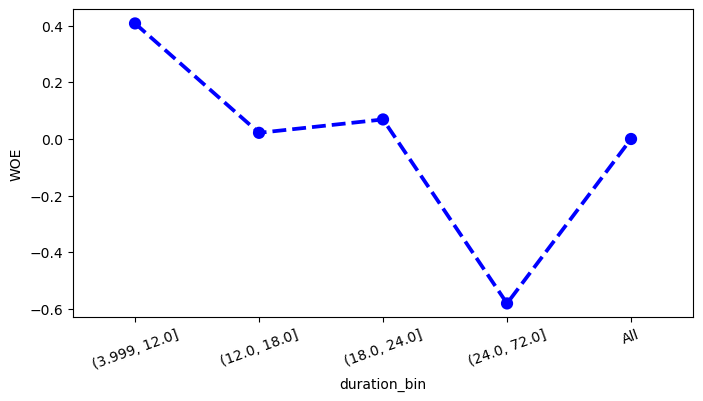

In [74]:
# Plot the WOE
plot_WOE(crosstab_person_duration_bin)

- Higher duration loans have higher risk than low duration loans
- Asumptions: higher duration loans have higher interest leading to payment failure risks

2. Credit amount

In [75]:
# Define the crosstab
crosstab_person_amount_bin = crosstab_list[1]

crosstab_person_amount_bin

class,bad,good,All,p_good,p_bad,WOE,contribution
credit_amount_bin,,,,,,,
"(249.999, 1336.0]",56,119,175,0.242857,0.266667,-0.093526,0.002227
"(1336.0, 2290.0]",38,137,175,0.279592,0.180952,0.435097,0.042918
"(2290.0, 3965.25]",40,135,175,0.275510,0.190476,0.369097,0.031386
"(3965.25, 18424.0]",76,99,175,0.202041,0.361905,-0.582911,0.093187
All,210,490,700,1.000000,1.000000,0.000000,0.000000


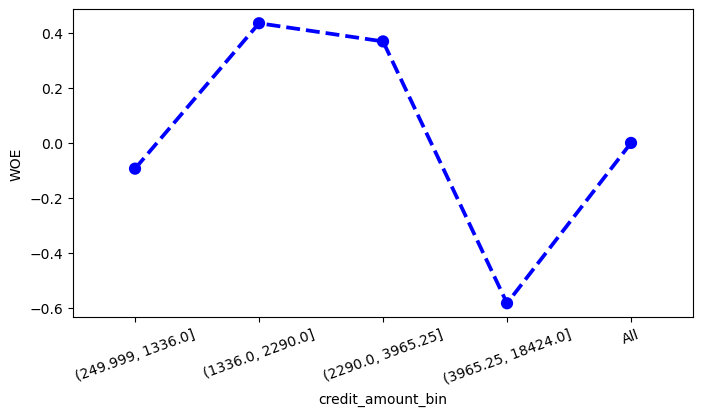

In [76]:
# Plot the WOE
plot_WOE(crosstab_person_amount_bin)

- Higher credit amount tend to have higher risks
- Assumption: Higher credit amount have higher interests

3. age

In [77]:
# Define the crosstab
crosstab_person_age_bin = crosstab_list[2]

crosstab_person_age_bin

class,bad,good,All,p_good,p_bad,WOE,contribution
age_bin,,,,,,,
"(19.999, 27.0]",76,126,202,0.257143,0.361905,-0.341749,0.035802
"(27.0, 33.0]",52,113,165,0.230612,0.247619,-0.071154,0.001210
"(33.0, 41.25]",39,119,158,0.242857,0.185714,0.268264,0.015329
"(41.25, 75.0]",43,132,175,0.269388,0.204762,0.274304,0.017727
All,210,490,700,1.000000,1.000000,0.000000,0.000000


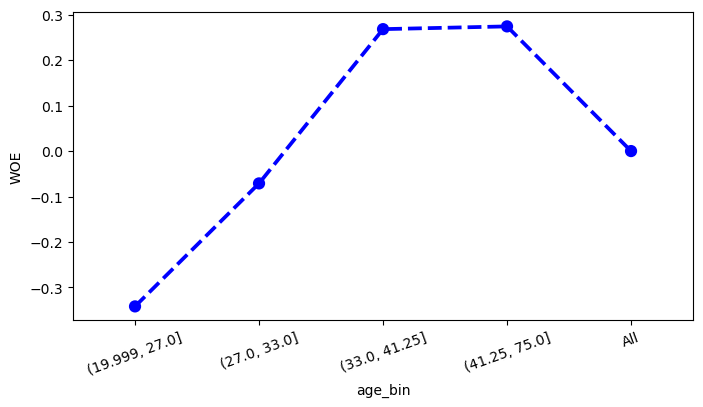

In [78]:
# Plot the WOE
plot_WOE(crosstab_person_age_bin)

- Young have higher risks than older debtors 
- Assumption: income of older debtors might be higher

4. Checking status

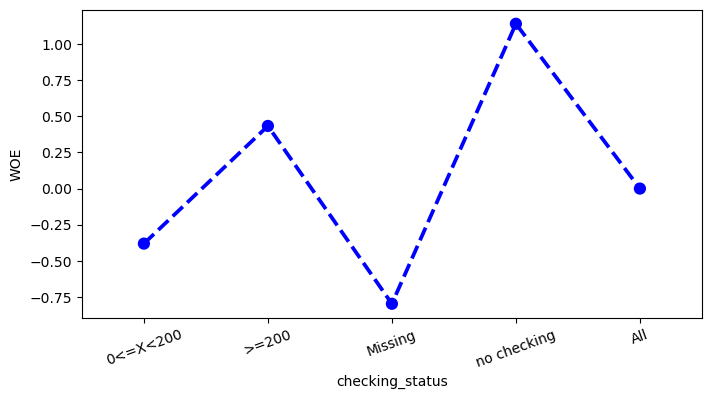

In [79]:
# Define the crosstab
crosstab_person_checking_bin = crosstab_list[3]

# Plot the WOE
plot_WOE(crosstab_person_checking_bin)

In [80]:
# Define the crosstab
crosstab_person_age_bin 

class,bad,good,All,p_good,p_bad,WOE,contribution
age_bin,,,,,,,
"(19.999, 27.0]",76,126,202,0.257143,0.361905,-0.341749,0.035802
"(27.0, 33.0]",52,113,165,0.230612,0.247619,-0.071154,0.001210
"(33.0, 41.25]",39,119,158,0.242857,0.185714,0.268264,0.015329
"(41.25, 75.0]",43,132,175,0.269388,0.204762,0.274304,0.017727
All,210,490,700,1.000000,1.000000,0.000000,0.000000


- `Missing category` has the highest risk
- `No checking` category has the lowest risk, with very high WOE
- Assumption: no checking category has data imbalance between good and bad classes (241 good vs 33 bad)

5. Credit History

In [81]:
# Define the crosstab
crosstab_person_history_bin = crosstab_list[4]

crosstab_person_history_bin
 

class,bad,good,All,p_good,p_bad,WOE,contribution
credit_history,,,,,,,
all paid,16,12,28,0.024490,0.076190,-1.134980,0.058679
critical/other existing credit,34,180,214,0.367347,0.161905,0.819298,0.168318
delayed previously,18,39,57,0.079592,0.085714,-0.074108,0.000454
existing paid,125,247,372,0.504082,0.595238,-0.166223,0.015152
no credits/all paid,17,12,29,0.024490,0.080952,-1.195605,0.067507
All,210,490,700,1.000000,1.000000,0.000000,0.000000


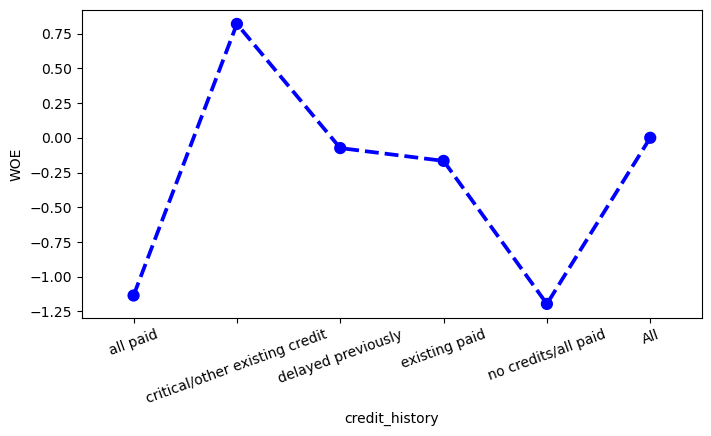

In [82]:
# Plot the WOE
plot_WOE(crosstab_person_history_bin)

- `All paid` and `no credits/all paid` have the highest risk of being `bad` class
- Only `critical/other existing credit` customers tend to be `good` class


6. Purpose

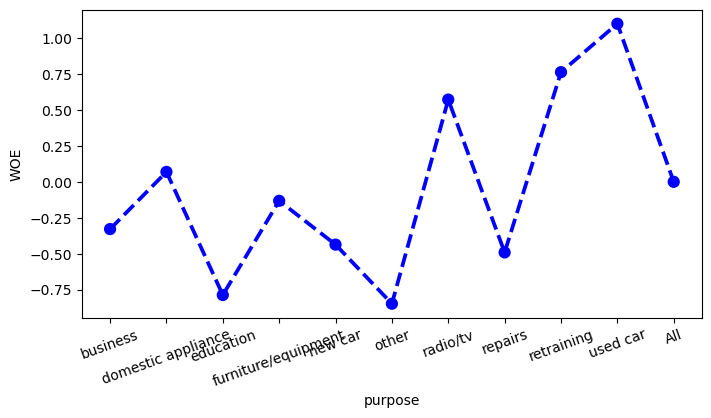

In [83]:
# Define the crosstab
crosstab_person_purpose_bin = crosstab_list[5]

# Plot the WOE
plot_WOE(crosstab_person_purpose_bin)

- `education` and `other` have the highest risk being bad class
- `used car` have the lowest risk

7. Saving status

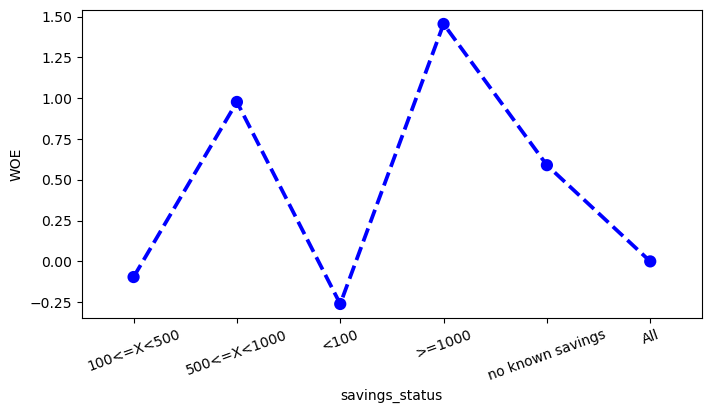

In [84]:
# Define the crosstab
crosstab_person_saving_bin = crosstab_list[6]

# Plot the WOE
plot_WOE(crosstab_person_saving_bin)

- `<100` has the highest risk of being bad blass

8. Employment

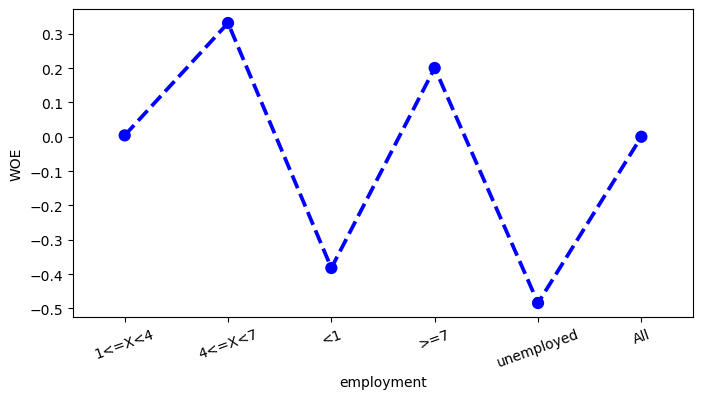

In [85]:
# Define the crosstab
crosstab_person_employment_bin = crosstab_list[7]

# Plot the WOE
plot_WOE(crosstab_person_employment_bin)

- `unemployed` as expected, has the highest risk of being `bad` class

9. Installment Commitment

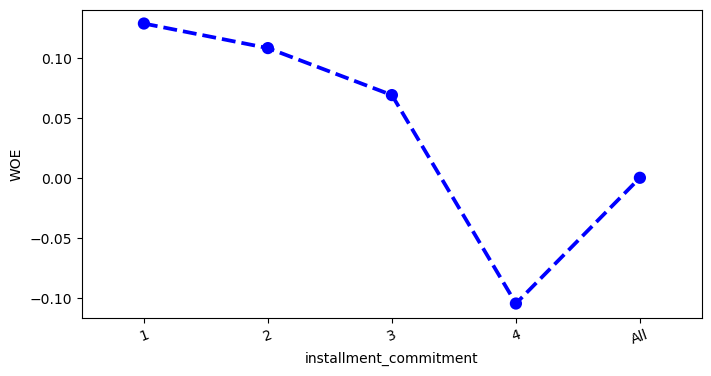

In [86]:
# Define the crosstab
crosstab_person_installment_bin = crosstab_list[8]

# Plot the WOE
plot_WOE(crosstab_person_installment_bin)

10. Personal status

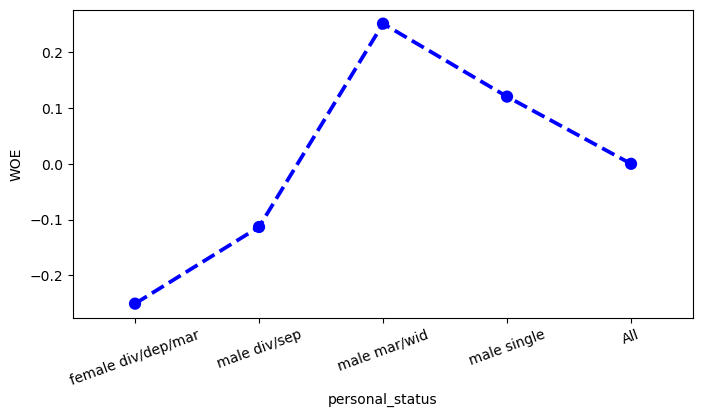

In [87]:
# Define the crosstab
crosstab_person_marital_bin = crosstab_list[9]

# Plot the WOE
plot_WOE(crosstab_person_marital_bin)

- `male mar/wid` have the lowest risk
- `female div/dep/mar` has the highest risk

11. Other Parties

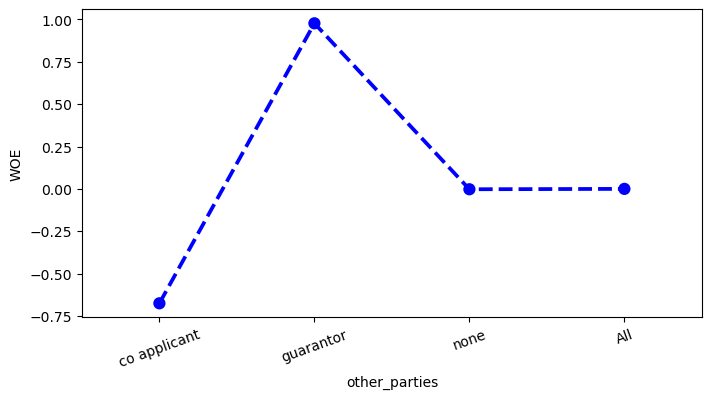

In [88]:
# Define the crosstab
crosstab_person_other_bin = crosstab_list[10]

# Plot the WOE
plot_WOE(crosstab_person_other_bin)

12. Residence since

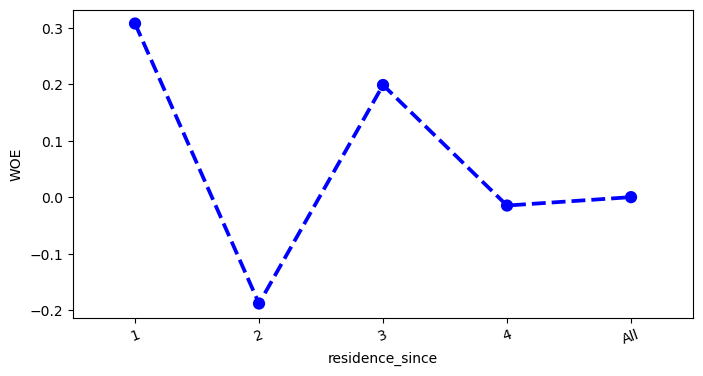

In [89]:
# Define the crosstab
crosstab_person_residence_bin = crosstab_list[11]

# Plot the WOE
plot_WOE(crosstab_person_residence_bin)

13. Property Magnitude

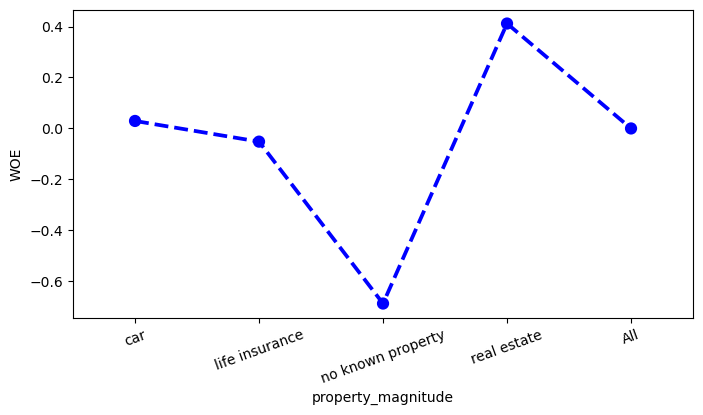

In [90]:
# Define the crosstab
crosstab_person_property_bin = crosstab_list[12]

# Plot the WOE
plot_WOE(crosstab_person_property_bin)

14. Other payment plans

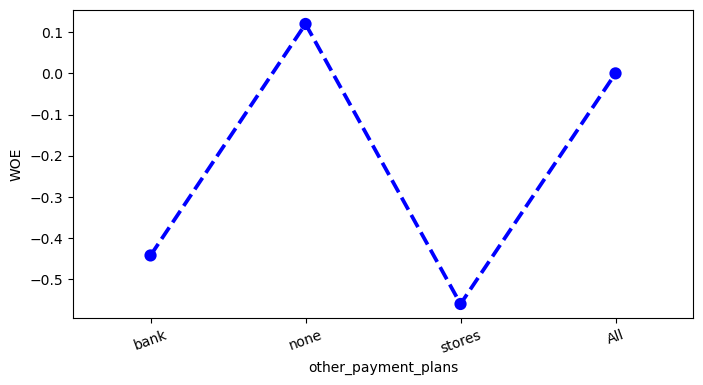

In [91]:
# Define the crosstab
crosstab_person_payment_bin = crosstab_list[13]

# Plot the WOE
plot_WOE(crosstab_person_payment_bin)

15. Housing

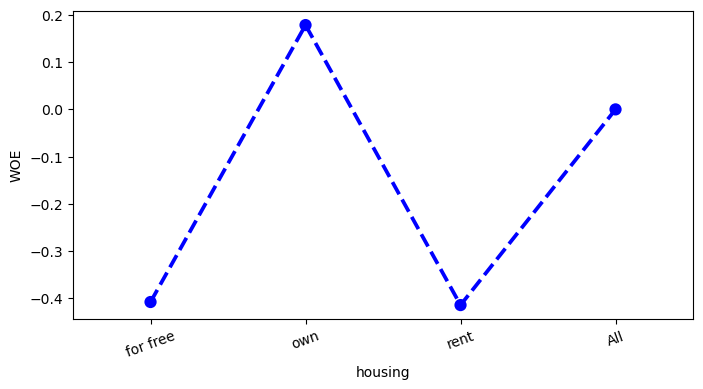

In [92]:
# Define the crosstab
crosstab_person_housing_bin = crosstab_list[14]

# Plot the WOE
plot_WOE(crosstab_person_housing_bin)

16. Existing Credits

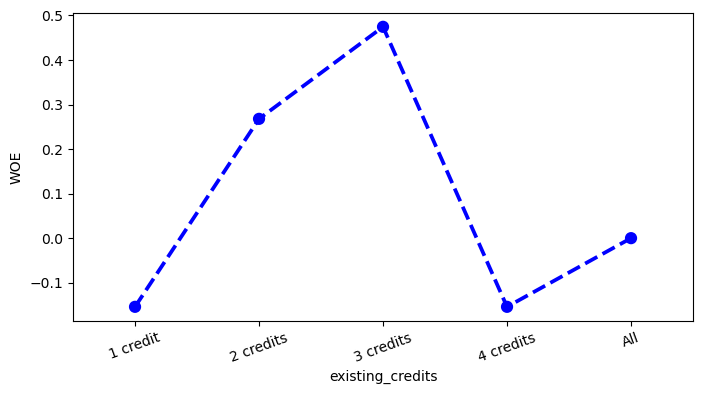

In [93]:
# Define the crosstab
crosstab_person_existing_bin = crosstab_list[15]

# Plot the WOE
plot_WOE(crosstab_person_existing_bin)

17. Job

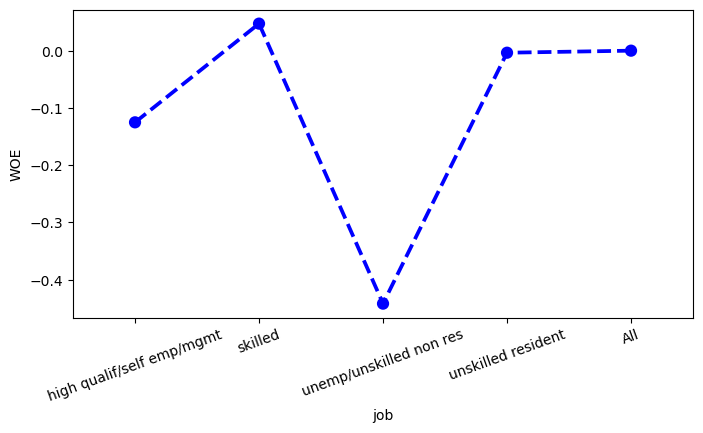

In [94]:
# Define the crosstab
crosstab_person_job_bin = crosstab_list[16]

# Plot the WOE
plot_WOE(crosstab_person_job_bin)

18. Num of dependents

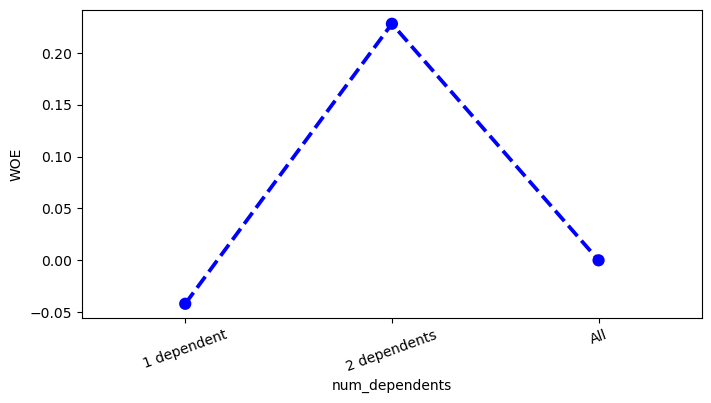

In [95]:
# Define the crosstab
crosstab_person_dependent_bin = crosstab_list[17]

# Plot the WOE
plot_WOE(crosstab_person_dependent_bin)

19. Own Telephone

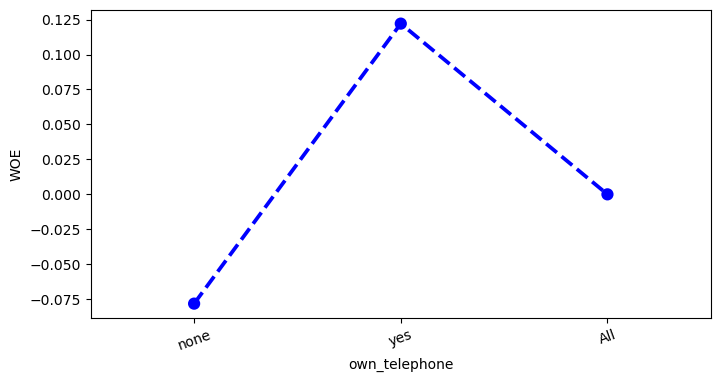

In [96]:
# Define the crosstab
crosstab_person_phone_bin = crosstab_list[18]

# Plot the WOE
plot_WOE(crosstab_person_phone_bin)

- `none` have higher risks than `yes`


20. Foreign Worker

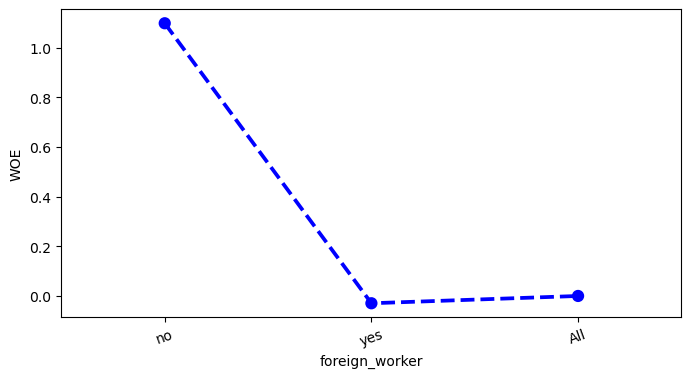

In [97]:
# Define the crosstab
crosstab_person_existing_bin = crosstab_list[19]

# Plot the WOE
plot_WOE(crosstab_person_existing_bin)

- Foreign worker has higher of being bad
- Assumption: because 

3.5. Test of Independence

In [98]:
# Display the IV Table
IV_table.sort_values('Information Value', ascending=False)

,Characteristic,Information Value,Strength
3,checking_status,0.637278,Strong
4,credit_history,0.310111,Strong
5,purpose,0.287034,Medium
6,savings_status,0.205745,Medium
1,credit_amount_bin,0.169717,Medium
0,duration_bin,0.142667,Medium
12,property_magnitude,0.121611,Medium
14,housing,0.073117,Weak
2,age_bin,0.070069,Weak
7,employment,0.069839,Weak


In [99]:
# Define a list of all characteristics
characteristic_list = IV_table['Characteristic']

In [100]:
# Import the libraries
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Create a function of independence test
def independence_test(data, characteristic_label, alpha=0.05):
    """
    Function to perform the independence test.

    Parameters
    ----------
    data : array like
      The name of dataset.

    characteristic_label : object
      The label of characteristic variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    Return
    ------
    res : dataframe
      The summary result of the independence test.

    """
    # Build the contingency table
    crosstab = pd.crosstab(data[characteristic_label],
                           data[response_variable],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        conclusion = 'Not Independent'
    else:
        conclusion = 'Independent'

    # Tabulate the results
    res = pd.DataFrame({'Characteristic': characteristic_label,
                        'Chi-stat': round(stat,2),
                        'P-value': pval,
                        'Conclusion': conclusion},
                       index=[0])

    return res

In [101]:
# Define initial table to summarize the test result
ind_table = pd.DataFrame({'Characteristic': [],
                        'Chi-stat': [],
                        'P-value': [],
                        'Conclusion': []})

# Perform independence test for all characteristics
for characteristic in characteristic_list:

  # Perform the independence test
  test_result = independence_test(data = data_train_binned,
                                  characteristic_label = characteristic,
                                  alpha = 0.05)

  # # Append test result to the table
  ind_table = pd.concat((ind_table, test_result),
                        axis = 0,
                        ignore_index = True)

In [102]:
# Check the results
ind_table

,Characteristic,Chi-stat,P-value,Conclusion
0,duration_bin,21.53,8.181764e-05,Not Independent
1,credit_amount_bin,25.33,1.315073e-05,Not Independent
2,age_bin,10.35,1.578835e-02,Not Independent
3,checking_status,83.46,5.546825e-18,Not Independent
4,credit_history,43.80,7.073503e-09,Not Independent
5,purpose,38.75,1.277257e-05,Not Independent
6,savings_status,25.15,4.689071e-05,Not Independent
7,employment,10.49,3.296529e-02,Not Independent
8,installment_commitment,1.61,6.571185e-01,Independent
9,personal_status,5.08,1.659774e-01,Independent


### 4. Design Scorecards

#### 4.1. Preprocessing Training set

In [103]:
# Check the train set
data_train_binned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         700 non-null    object  
 1   duration                700 non-null    int64   
 2   credit_history          700 non-null    object  
 3   purpose                 700 non-null    object  
 4   credit_amount           700 non-null    int64   
 5   savings_status          700 non-null    object  
 6   employment              700 non-null    object  
 7   installment_commitment  700 non-null    object  
 8   personal_status         700 non-null    object  
 9   other_parties           700 non-null    object  
 10  residence_since         700 non-null    object  
 11  property_magnitude      700 non-null    object  
 12  age                     700 non-null    int64   
 13  other_payment_plans     700 non-null    object  
 14  housing                 

In [104]:
# Define data train
raw_train = data_train_binned.drop(columns = num_columns,
                                   axis = 1)
raw_train = raw_train.drop(columns = [response_variable],
                           axis = 1)

raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         700 non-null    object  
 1   credit_history          700 non-null    object  
 2   purpose                 700 non-null    object  
 3   savings_status          700 non-null    object  
 4   employment              700 non-null    object  
 5   installment_commitment  700 non-null    object  
 6   personal_status         700 non-null    object  
 7   other_parties           700 non-null    object  
 8   residence_since         700 non-null    object  
 9   property_magnitude      700 non-null    object  
 10  other_payment_plans     700 non-null    object  
 11  housing                 700 non-null    object  
 12  existing_credits        700 non-null    category
 13  job                     700 non-null    object  
 14  num_dependents          

Drop `existing credits` category to avoid problems in converting values to WOE

In [105]:
raw_train = raw_train.drop(columns = "existing_credits", axis = 'columns')
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         700 non-null    object  
 1   credit_history          700 non-null    object  
 2   purpose                 700 non-null    object  
 3   savings_status          700 non-null    object  
 4   employment              700 non-null    object  
 5   installment_commitment  700 non-null    object  
 6   personal_status         700 non-null    object  
 7   other_parties           700 non-null    object  
 8   residence_since         700 non-null    object  
 9   property_magnitude      700 non-null    object  
 10  other_payment_plans     700 non-null    object  
 11  housing                 700 non-null    object  
 12  job                     700 non-null    object  
 13  num_dependents          700 non-null    category
 14  own_telephone           

Convert values in dataset to WOE

In [106]:
# Make a copy for the raw data train
woe_train = raw_train.copy()


for column in raw_train.columns:

  # Define the raw data train in woe_train as categorical values
  woe_train[column] = pd.Categorical(values = raw_train[column],
                      ordered = False)

  # Recall WOE table for each column
  crosstab = WOE_table[WOE_table['Characteristic'] == column]

  # Make a list of the WOE for each attribute in each column
  woe_list = crosstab['WOE'].to_list()

  # Rename the categorical values in woe_train as woe value
  woe_train[column] = woe_train[column].cat.rename_categories(woe_list)


# Check the table
woe_train.T

c:\Users\Mint_01\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
c:\Users\Mint_01\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,328,891,255,243,492,597,7,951,224,317,127,587,967,355,896,841,281,702,402,293,96,20,855,104,833,...,117,581,256,611,808,605,649,972,330,564,773,733,44,886,923,460,603,286,729,747,73,401,769,2,617
checking_status,0.433636,1.140992,-0.380924,1.140992,1.140992,-0.380924,-0.380924,-0.797536,1.140992,-0.380924,-0.380924,-0.797536,1.140992,-0.380924,-0.797536,1.140992,1.140992,0.433636,1.140992,0.433636,1.140992,1.140992,1.140992,1.140992,-0.380924,...,-0.797536,-0.380924,1.140992,0.433636,-0.380924,-0.797536,-0.797536,-0.797536,-0.797536,-0.380924,1.140992,1.140992,-0.797536,-0.380924,-0.380924,-0.797536,1.140992,-0.797536,0.433636,-0.797536,-0.380924,-0.380924,1.140992,1.140992,-0.797536
credit_history,-0.166223,0.819298,-0.074108,0.819298,0.819298,-1.195605,-0.166223,-0.074108,-0.166223,-0.166223,-0.166223,-0.166223,-0.166223,-0.166223,-0.166223,-0.074108,-0.166223,-0.166223,-0.074108,0.819298,0.819298,0.819298,-0.166223,-0.166223,-0.166223,...,0.819298,0.819298,0.819298,-0.166223,-1.134980,-1.134980,-0.166223,-1.134980,0.819298,-0.074108,0.819298,-0.166223,0.819298,0.819298,-0.166223,-0.166223,-0.166223,-0.166223,0.819298,-0.166223,0.819298,0.819298,0.819298,0.819298,0.819298
purpose,0.571362,0.571362,0.571362,-0.328504,0.571362,-0.328504,1.098612,-0.328504,1.098612,-0.132172,-0.490623,-0.132172,0.571362,-0.436556,0.571362,1.098612,-0.132172,0.571362,-0.328504,1.098612,-0.786673,-0.436556,-0.436556,1.098612,0.571362,...,-0.132172,-0.436556,0.571362,-0.436556,1.098612,-0.132172,-0.786673,-0.436556,1.098612,-0.328504,0.571362,1.098612,1.098612,-0.328504,-0.436556,-0.132172,-0.132172,1.098612,-0.328504,-0.436556,-0.328504,-0.328504,0.571362,-0.786673,-0.436556
savings_status,-0.260965,-0.260965,0.589769,-0.260965,-0.095882,-0.260965,-0.260965,-0.260965,-0.260965,0.589769,-0.260965,-0.260965,-0.260965,-0.260965,-0.260965,-0.260965,-0.260965,-0.095882,-0.260965,-0.260965,0.589769,-0.260965,-0.095882,0.589769,0.589769,...,0.589769,-0.260965,-0.260965,-0.095882,-0.260965,0.977251,-0.260965,-0.260965,-0.260965,0.589769,-0.095882,1.455287,-0.260965,0.589769,-0.260965,-0.260965,-0.260965,-0.260965,1.455287,-0.260965,-0.260965,0.589769,-0.260965,-0.260965,-0.260965
employment,0.200394,0.200394,0.004073,0.004073,0.004073,0.004073,0.004073,0.331357,0.004073,0.004073,0.004073,0.004073,0.200394,-0.382409,-0.382409,0.004073,0.004073,0.200394,-0.382409,0.200394,0.331357,0.004073,-0.382409,-0.382409,0.200394,...,-0.382409,-0.382409,0.004073,0.200394,-0.484392,0.004073,0.004073,-0.484392,-0.484392,0.004073,0.200394,0.004073,0.200394,0.331357,0.331357,0.004073,0.004073,0.331357,0.004073,-0.382409,0.331357,0.004073,0.200394,0.331357,0.004073
installment_commitment,-0.104924,-0.104924,0.128712,0.068993,0.128712,0.128712,0.108214,0.108214,0.068993,0.128712,-0.104924,-0.104924,-0.104924,-0.104924,-0.104924,0.068993,-0.104924,-0.104924,0.108214,-0.104924,-0.104924,-0.104924,-0.104924,0.108214,0.108214,...,0.108214,0.128712,-0.104924,0.128712,0.128712,-0.104924,-0.104924,0.128712,0.108214,-0.104924,-0.104924,0.108214,-0.104924,-0.104924,0.068993,0.128712,-0.104924,-0.104924,0.108214,0.068993,0.108214,-0.104924,0.108214,0.108214,0.128712
personal_status,0.120475,0.120475,0.120475,-0.250778,-0.250778,0.120475,0.120475,0.120475,0.120475,-0.250778,0.120475,0.120475,-0.250778,0.120475,-0.250778,0.120475,0.120475,-0.250778,0.120475,0.120475,-0.250778,0.120475,0.251314,0.251314,-0.250778,...,-0.250778,0.120475,0.120475,-0.250778,0.120475,0.120475,0.120475,-0.250778,0.120475,0.120475,0.120475,-0.250778,-0.250778,0.120475,0.120475,0.120475,-0.250778,0.120475,-0.113329,-0.250778,-0.250778,0.251314,0.120475,0.120475,0.120475
other_parties,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,0.977251,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,...,-0.675448,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.67544

#### 4.2. Preprocessing Testing set

In [107]:
# Concatenate X_test and y_test as data_test
data_test = pd.concat((X_test, y_test),
                      axis = 1)

# Validate data_test
print('Test data shape:', data_test.shape)

Test data shape: (300, 21)


##### 4.2.1. Binning

In [108]:
# Binning numerical columns in test data
for column in num_columns:
  data_test_binned = create_binning(data = data_test,
                                    predictor_label = column,
                                    num_of_bins = 4)

In [109]:
# Sanity check
data_test_binned.T

,80,157,65,489,804,696,122,528,92,320,244,352,480,56,572,212,977,985,810,596,732,866,301,588,87,...,556,296,69,119,377,395,368,630,260,200,370,549,540,67,263,418,963,47,870,356,19,208,627,357,964
checking_status,no checking,<0,no checking,no checking,0<=X<200,0<=X<200,no checking,<0,no checking,0<=X<200,no checking,no checking,0<=X<200,0<=X<200,no checking,<0,0<=X<200,<0,0<=X<200,<0,0<=X<200,<0,0<=X<200,<0,0<=X<200,...,0<=X<200,no checking,no checking,0<=X<200,no checking,0<=X<200,<0,<0,<0,no checking,no checking,no checking,0<=X<200,0<=X<200,no checking,no checking,no checking,<0,no checking,no checking,no checking,<0,0<=X<200,no checking,0<=X<200
duration,24,12,27,6,12,12,12,36,12,30,12,18,12,12,24,27,18,15,8,24,8,18,36,18,36,...,18,12,36,12,7,39,36,24,12,9,36,48,12,12,12,21,24,6,36,12,24,24,9,36,6
credit_history,existing paid,all paid,existing paid,existing paid,existing paid,existing paid,existing paid,existing paid,critical/other existing credit,critical/other existing credit,all paid,critical/other existing credit,critical/other existing credit,existing paid,existing paid,no credits/all paid,delayed previously,critical/other existing credit,existing paid,existing paid,existing paid,existing paid,no credits/all paid,existing paid,existing paid,...,no credits/all paid,existing paid,existing paid,critical/other existing credit,delayed previously,delayed previously,existing paid,existing paid,existing paid,critical/other existing credit,existing paid,critical/other existing credit,existing paid,existing paid,critical/other existing credit,existing paid,existing paid,existing paid,delayed previously,critical/other existing credit,existing paid,existing paid,all paid,delayed previously,existing paid
purpose,radio/tv,retraining,repairs,new car,new car,radio/tv,furniture/equipment,radio/tv,radio/tv,new car,retraining,used car,radio/tv,radio/tv,used car,business,business,furniture/equipment,business,new car,radio/tv,radio/tv,radio/tv,domestic appliance,education,...,new car,used car,radio/tv,new car,radio/tv,education,furniture/equipment,radio/tv,furniture/equipment,education,new car,used car,radio/tv,new car,education,new car,radio/tv,used car,furniture/equipment,radio/tv,radio/tv,business,new car,radio/tv,repairs
credit_amount,5943,339,5190,3518,7472,1103,1768,2302,797,4249,3447,3229,3573,6468,5433,5293,2427,1433,907,1442,760,2389,3804,1217,12612,...,2278,4675,2394,2366,846,11760,3446,3660,1657,936,3079,8858,1534,1007,2748,2782,2397,1352,7678,2331,3430,6568,1437,4463,454
savings_status,no known savings,<100,no known savings,<100,no known savings,<100,<100,<100,no known savings,<100,500<=X<1000,no known savings,<100,no known savings,no known savings,<100,no known savings,<100,<100,<100,<100,<100,<100,<100,100<=X<500,...,100<=X<500,no known savings,no known savings,500<=X<1000,no known savings,100<=X<500,<100,<100,<100,500<=X<1000,no known savings,no known savings,<100,>=1000,<100,500<=X<1000,500<=X<1000,500<=X<1000,500<=X<1000,no known savings,500<=X<1000,<100,100<=X<500,<100,<100
employment,<1,>=7,>=7,1<=X<4,unemployed,4<=X<7,1<=X<4,1<=X<4,>=7,unemployed,1<=X<4,unemployed,1<=X<4,unemployed,unemployed,unemployed,>=7,1<=X<4,<1,4<=X<7,4<=X<7,<1,1<=X<4,1<=X<4,1<=X<4,...,<1,<1,1<=X<4,4<=X<7,>=7,4<=X<7,>=7,1<=X<4,1<=X<4,>=7,1<=X<4,4<=X<7,<1,1<=X<4,>=7,4<=X<7,>=7,unemployed,4<=X<7,>=7,>=7,1<=X<4,4<=X<7,1<=X<4,<1
installment_commitment,1,4,4,2,1,4,3,4,4,4,4,2,1,2,2,2,4,4,3,4,4,4,4,4,1,...,3,1,4,3,3,2,4,2,2,4,4,2,1,4,2,1,3,1,2,1,3,2,2,4,3
personal_status,female div/dep/mar,male mar/wid,male single,male single,female div/dep/mar,male single,male single,male div/sep,female div/dep/mar,male mar/wid,female div/dep/mar,male single,female div/dep/mar,male single,female div/dep/mar,male single,male single,female div/dep/mar,male mar/wid,female div/dep/mar,female div/dep/mar,female div/dep/mar,female div/dep/mar,male mar/wid,male single,...,female div/dep/mar,female div/dep/mar,female div/dep/mar,male div/sep,male single,male single,male single

Rename values in `num_dependents` and `existing credits`

In [110]:
# Rename values in category column to 
data_test_binned["num_dependents"] = data_test_binned["num_dependents"].astype('category')

data_test_binned["num_dependents"] = data_test_binned["num_dependents"].cat.rename_categories({1: "1 dependent" , 2: "2 dependents"})

In [111]:
# Sanity check
data_test_binned["num_dependents"].value_counts()

1 dependent     259
2 dependents     41
Name: num_dependents, dtype: int64

In [112]:
# Convert to categorical
data_test_binned["existing_credits"] = data_test_binned["existing_credits"].astype('category')

data_test_binned["existing_credits"] = data_test_binned["existing_credits"].cat.rename_categories({1: "1 credit" , 2: "2 credits", 3: "3 credits" , 4: "4 credits"})

In [113]:
# Sanity check
data_test_binned["existing_credits"].value_counts()

1 credit     198
2 credits     90
3 credits      9
4 credits      3
Name: existing_credits, dtype: int64

##### 4.2.2. Convert dataset values to WOE

In [114]:
raw_test = data_test_binned.drop(columns = num_columns,
                                 axis = 1)
raw_test = raw_test.drop(columns = [response_variable],
                         axis = 1)

raw_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 80 to 964
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         300 non-null    object  
 1   credit_history          300 non-null    object  
 2   purpose                 300 non-null    object  
 3   savings_status          300 non-null    object  
 4   employment              300 non-null    object  
 5   installment_commitment  300 non-null    int64   
 6   personal_status         300 non-null    object  
 7   other_parties           300 non-null    object  
 8   residence_since         300 non-null    int64   
 9   property_magnitude      300 non-null    object  
 10  other_payment_plans     300 non-null    object  
 11  housing                 300 non-null    object  
 12  existing_credits        300 non-null    category
 13  job                     300 non-null    object  
 14  num_dependents          3

In [115]:
raw_test = raw_test.drop(columns = "existing_credits", axis = 'columns')
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 80 to 964
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         300 non-null    object  
 1   credit_history          300 non-null    object  
 2   purpose                 300 non-null    object  
 3   savings_status          300 non-null    object  
 4   employment              300 non-null    object  
 5   installment_commitment  300 non-null    int64   
 6   personal_status         300 non-null    object  
 7   other_parties           300 non-null    object  
 8   residence_since         300 non-null    int64   
 9   property_magnitude      300 non-null    object  
 10  other_payment_plans     300 non-null    object  
 11  housing                 300 non-null    object  
 12  job                     300 non-null    object  
 13  num_dependents          300 non-null    category
 14  own_telephone           3

In [116]:
# Make a copy for the raw data test
woe_test = raw_test.copy()


for column in raw_test.columns:

  # Define the raw data test in woe_test as categorical values
  woe_test[column] = pd.Categorical(values = raw_test[column],
                                    ordered = True)

  # Recall WOE table for each column
  crosstab = WOE_table[WOE_table['Characteristic'] == column]

  # Make a list of the WOE for each attribute in each column
  woe_list = crosstab['WOE'].to_list()

  # Rename the categorical values in woe_test as woe value
  woe_test[column] = woe_test[column].cat.rename_categories(woe_list)

# Check the table
woe_test.T

,80,157,65,489,804,696,122,528,92,320,244,352,480,56,572,212,977,985,810,596,732,866,301,588,87,...,556,296,69,119,377,395,368,630,260,200,370,549,540,67,263,418,963,47,870,356,19,208,627,357,964
checking_status,1.140992,0.433636,1.140992,1.140992,-0.380924,-0.380924,1.140992,0.433636,1.140992,-0.380924,1.140992,1.140992,-0.380924,-0.380924,1.140992,0.433636,-0.380924,0.433636,-0.380924,0.433636,-0.380924,0.433636,-0.380924,0.433636,-0.380924,...,-0.380924,1.140992,1.140992,-0.380924,1.140992,-0.380924,0.433636,0.433636,0.433636,1.140992,1.140992,1.140992,-0.380924,-0.380924,1.140992,1.140992,1.140992,0.433636,1.140992,1.140992,1.140992,0.433636,-0.380924,1.140992,-0.380924
credit_history,-0.166223,-1.134980,-0.166223,-0.166223,-0.166223,-0.166223,-0.166223,-0.166223,0.819298,0.819298,-1.134980,0.819298,0.819298,-0.166223,-0.166223,-1.195605,-0.074108,0.819298,-0.166223,-0.166223,-0.166223,-0.166223,-1.195605,-0.166223,-0.166223,...,-1.195605,-0.166223,-0.166223,0.819298,-0.074108,-0.074108,-0.166223,-0.166223,-0.166223,0.819298,-0.166223,0.819298,-0.166223,-0.166223,0.819298,-0.166223,-0.166223,-0.166223,-0.074108,0.819298,-0.166223,-0.166223,-1.134980,-0.074108,-0.166223
purpose,0.571362,0.762140,-0.490623,-0.436556,-0.436556,0.571362,-0.132172,0.571362,0.571362,-0.436556,0.762140,1.098612,0.571362,0.571362,1.098612,-0.328504,-0.328504,-0.132172,-0.328504,-0.436556,0.571362,0.571362,0.571362,0.068993,-0.786673,...,-0.436556,1.098612,0.571362,-0.436556,0.571362,-0.786673,-0.132172,0.571362,-0.132172,-0.786673,-0.436556,1.098612,0.571362,-0.436556,-0.786673,-0.436556,0.571362,1.098612,-0.132172,0.571362,0.571362,-0.328504,-0.436556,0.571362,-0.490623
savings_status,0.589769,-0.260965,0.589769,-0.260965,0.589769,-0.260965,-0.260965,-0.260965,0.589769,-0.260965,0.977251,0.589769,-0.260965,0.589769,0.589769,-0.260965,0.589769,-0.260965,-0.260965,-0.260965,-0.260965,-0.260965,-0.260965,-0.260965,-0.095882,...,-0.095882,0.589769,0.589769,0.977251,0.589769,-0.095882,-0.260965,-0.260965,-0.260965,0.977251,0.589769,0.589769,-0.260965,1.455287,-0.260965,0.977251,0.977251,0.977251,0.977251,0.589769,0.977251,-0.260965,-0.095882,-0.260965,-0.260965
employment,-0.382409,0.200394,0.200394,0.004073,-0.484392,0.331357,0.004073,0.004073,0.200394,-0.484392,0.004073,-0.484392,0.004073,-0.484392,-0.484392,-0.484392,0.200394,0.004073,-0.382409,0.331357,0.331357,-0.382409,0.004073,0.004073,0.004073,...,-0.382409,-0.382409,0.004073,0.331357,0.200394,0.331357,0.200394,0.004073,0.004073,0.200394,0.004073,0.331357,-0.382409,0.004073,0.200394,0.331357,0.200394,-0.484392,0.331357,0.200394,0.200394,0.004073,0.331357,0.004073,-0.382409
installment_commitment,0.128712,-0.104924,-0.104924,0.108214,0.128712,-0.104924,0.068993,-0.104924,-0.104924,-0.104924,-0.104924,0.108214,0.128712,0.108214,0.108214,0.108214,-0.104924,-0.104924,0.068993,-0.104924,-0.104924,-0.104924,-0.104924,-0.104924,0.128712,...,0.068993,0.128712,-0.104924,0.068993,0.068993,0.108214,-0.104924,0.108214,0.108214,-0.104924,-0.104924,0.108214,0.128712,-0.104924,0.108214,0.128712,0.068993,0.128712,0.108214,0.128712,0.068993,0.108214,0.108214,-0.104924,0.068993
personal_status,-0.250778,0.251314,0.120475,0.120475,-0.250778,0.120475,0.120475,-0.113329,-0.250778,0.251314,-0.250778,0.120475,-0.250778,0.120475,-0.250778,0.120475,0.120475,-0.250778,0.251314,-0.250778,-0.250778,-0.250778,-0.250778,0.251314,0.120475,...,-0.250778,-0.250778,-0.250778,-0.113329,0.120475,0.120475,0.120475,-0.250778,0.120475,0.120475,0.120475,0.120475,0.251314,0.251314,-0.250778,-0.250778,0.120475,-0.250778,-0.250778,0.120475,0.120475,0.251314,0.120475,0.120475,0.251314
other_parties,-0.002270,-0.002270,-0.002270,0.977251,-0.002270,0.977251,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,0.977251,-0.002270,-0.002270,-0.002270,-0.002270,...,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270,-0.

#### 4.3. Logistic Regression Modelling

In [117]:
# Define X_train
X_train = woe_train.to_numpy()
X_train

array([[ 0.43363599, -0.16622326,  0.57136179, ..., -0.5806692 ,
        -0.58291135, -0.07115376],
       [ 1.14099151,  0.81929847,  0.57136179, ...,  0.02173999,
         0.43509691,  0.27430395],
       [-0.380924  , -0.07410797,  0.57136179, ..., -0.5806692 ,
        -0.58291135, -0.34174929],
       ...,
       [ 1.14099151,  0.81929847,  0.57136179, ...,  0.40805914,
         0.43509691,  0.27430395],
       [ 1.14099151,  0.81929847, -0.78667324, ...,  0.40805914,
         0.43509691,  0.27430395],
       [-0.79753635,  0.81929847, -0.4365557 , ...,  0.40805914,
         0.36909746,  0.26826399]])

In [118]:
X_train.shape

(700, 19)

In [119]:
# Check y_train
y_train = y_train.to_numpy()
y_train

array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype=object)

In [120]:
y_train.shape

(700,)

In [121]:
# Rename Good=0, Bad=1
y_train[y_train == 'bad'] = 1
y_train[y_train == 'good'] = 0


In [122]:
# Convert to int
y_train = y_train.astype('i')
y_train = np.int64(y_train)
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
# Sanity check
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### 4.3.1. Get best LR model

In [124]:
# Import library
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

Forward Selection

In [125]:
def forward(X, y, predictors, scoring='roc_auc', cv=5):
    """
    Function to perform best subset selection procedure.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
      All predictors set.

    y : {array-like} of shape (n_sample, )
      The dependent or response variable.

    predictors : {array-like} of shape (n_sample, )
      Index of predictors

    scoring : a single {str}, default='roc_auc'
      The scoring parameter based on scikit-learn cross_validate documentation.

    cv : int, default=5
      Number of folds for k-Fold CV.

    Returns
    -------
    models : {array-like} of shape (n_combinations, k)
      Summary of predictors and its AIC score for each possible combination.

    best_model : {array-like} of shape (2, )
      Best model of models with the smallest AIC score.
    """

    # Initialize list of results
    results = []

    # Define sample size and  number of all predictors
    n_samples, n_predictors = X.shape

    # Define list of all predictors
    col_list = np.arange(n_predictors)

    # Define remaining predictors for each k
    remaining_predictors = [p for p in col_list if p not in predictors]

    # Initialize list of predictors and its CV Score
    pred_list = []
    score_list = []

    # Cross validate each possible combination of remaining predictors
    for p in remaining_predictors:
        combi = predictors + [p]

        # Extract predictors combination
        X_ = X[:, combi]
        y_ = y

        # Define the estimator
        model = LogisticRegression(penalty = 'none',
                                   class_weight = 'balanced')

        # Cross validate the recall scores of the model
        cv_results = cross_validate(estimator = model,
                                    X = X_,
                                    y = y_,
                                    scoring = scoring,
                                    cv = cv)

        # Calculate the average CV/recall score
        score_ = np.mean(cv_results['test_score'])

        # Append predictors combination and its CV Score to the list
        pred_list.append(list(combi))
        score_list.append(score_)

    # Tabulate the results
    models = pd.DataFrame({"Predictors": pred_list,
                           "Recall": score_list})

    # Choose the best model
    best_model = models.loc[models['Recall'].argmax()]

    return models, best_model

Prepare the table for forward selection

In [126]:
# Define predictor for the null model
predictor = []

# The predictor in the null model is zero values for all predictors
X_null = np.zeros((X_train.shape[0], 1))

# Define the estimator
model = LogisticRegression(penalty = 'none',
                           class_weight = 'balanced')

# Cross validate
cv_results = cross_validate(estimator = model,
                            X = X_null,
                            y = y_train,
                            cv = 10,
                            scoring = 'recall')

# Calculate the average CV/recall score
score_ = np.mean(cv_results['test_score'])

# Create table for the best model of each k predictors
# Append the results of null model
forward_models = pd.DataFrame({"Predictors": [predictor],
                               "Recall": [score_]})

In [127]:
# Display the table
forward_models

,Predictors,Recall
0,[],0.0


Forward Selection 

In [128]:
# Define list of predictors
predictors = []
n_predictors = X_train.shape[1]

# Perform forward selection procedure for k=1,...,11 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train,
                            y = y_train,
                            predictors = predictors,
                            scoring = 'recall',
                            cv = 10)

    # Tabulate the best model of each k predictors
    forward_models.loc[k+1] = best_model
    predictors = best_model['Predictors']

In [129]:
forward_models

,Predictors,Recall
0,[],0.000000
1,[15],0.985714
2,"[15, 7]",0.961905
3,"[15, 7, 13]",0.833333
4,"[15, 7, 13, 12]",0.842857
5,"[15, 7, 13, 12, 3]",0.800000
6,"[15, 7, 13, 12, 3, 5]",0.795238
7,"[15, 7, 13, 12, 3, 5, 14]",0.757143
8,"[15, 7, 13, 12, 3, 5, 14, 8]",0.738095
9,"[15, 7, 13, 12, 3, 5, 14, 8, 0]",0.723810


In [130]:
# Find the best Recall score
best_idx = forward_models['Recall'].argmax()
best_recall = forward_models['Recall'].loc[best_idx]
best_predictors = forward_models['Predictors'].loc[best_idx]

# Print the summary
print('Best index            :', best_idx)
print('Best Recall           :', best_recall)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(raw_train.columns[best_predictors].tolist())

Best index            : 1
Best Recall           : 0.9857142857142858
Best predictors (idx) : [15]
Best predictors       :
['foreign_worker']


In [131]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = 'none',
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty='none')

In [132]:
best_model_intercept = pd.DataFrame({'Estimate': best_model.intercept_},
                                    index = ["Intercept"])
best_model_intercept

,Estimate
Intercept,0.0


In [133]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Estimate':  np.reshape(best_model.coef_, best_idx)},
                                index = best_model_params)

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0)

best_model_summary

,Estimate
Intercept,0.0
foreign_worker,-1.0


- Scorecard with 1 predictor doesn't make sense, even with the best Recall score (0.98%)
- We will select best model with more predictors, based on recall score (according to Naim Shidiqi's book, scorecard needs to have 8-15)

In [134]:
# Sort based on recall score
forward_models.sort_values(by=['Recall'], ascending=False)

,Predictors,Recall
1,[15],0.985714
2,"[15, 7]",0.961905
4,"[15, 7, 13, 12]",0.842857
3,"[15, 7, 13]",0.833333
5,"[15, 7, 13, 12, 3]",0.800000
6,"[15, 7, 13, 12, 3, 5]",0.795238
17,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10,...",0.776190
16,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10,...",0.766667
12,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16]",0.766667
15,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10,...",0.766667


In [135]:
more_predictors = forward_models.loc[8:15]
more_predictors

,Predictors,Recall
8,"[15, 7, 13, 12, 3, 5, 14, 8]",0.738095
9,"[15, 7, 13, 12, 3, 5, 14, 8, 0]",0.723810
10,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17]",0.738095
11,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1]",0.747619
12,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16]",0.766667
13,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10]",0.761905
14,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10, 6]",0.766667
15,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10,...",0.766667


In [136]:
# Find the best Recall score
best_idx = more_predictors['Recall'].idxmax()
best_recall = more_predictors['Recall'].loc[best_idx]
best_predictors = more_predictors['Predictors'].loc[best_idx]

# Print the summary
print('Best index            :', best_idx)
print('Best Recall           :', best_recall)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(raw_train.columns[best_predictors].tolist())

Best index            : 12
Best Recall           : 0.7666666666666666
Best predictors (idx) : [15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16]
Best predictors       :
['foreign_worker', 'other_parties', 'num_dependents', 'job', 'savings_status', 'installment_commitment', 'own_telephone', 'residence_since', 'checking_status', 'credit_amount_bin', 'credit_history', 'duration_bin']


In [137]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = 'none',
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty='none')

In [138]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Estimate':  np.reshape(best_model.coef_, best_idx)},
                                index = best_model_params)

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0)

best_model_summary

,Estimate
Intercept,0.000000
foreign_worker,-1.356749
other_parties,-1.400537
num_dependents,-0.822821
job,-0.339231
savings_status,-0.861817
installment_commitment,-1.746057
own_telephone,-1.533954
residence_since,-1.893680
checking_status,-0.935237


- We have a new model with 12 predictors: `'foreign_worker', 'other_parties', 'num_dependents', 'job', 'savings_status', 'installment_commitment', 'own_telephone', 'residence_since', 'checking_status', 'credit_amount_bin', 'credit_history', 'duration_bin'`

#### 4.5. Model Evaluation

Predict on Train Data

In [139]:
# Import metrics package
from sklearn.metrics import recall_score

In [140]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [141]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.7523809523809524

- Di data train, performa model 0.75, berkurang 1% dari 0.76 dari hasil di tabel cross validation

In [142]:
# Predict the probability estimates
y_train_pred_proba = best_model.predict_proba(X_train_best)[:,[1]]
y_train_pred_proba

array([[0.81508386],
       [0.13611397],
       [0.52545168],
       ...,
       [0.08274058],
       [0.06151272],
       [0.28719138]])

<AxesSubplot:ylabel='Count'>

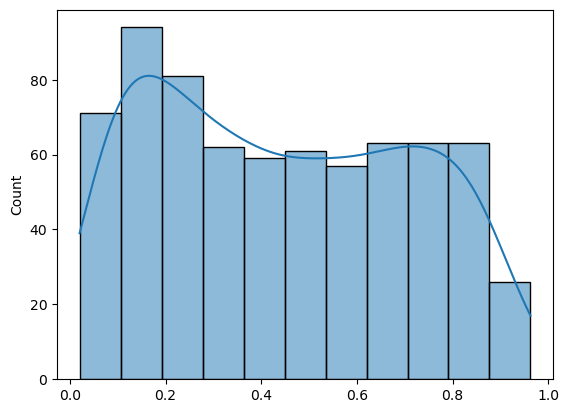

In [143]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_train_pred_proba,
                            y_train.shape[0]),
             kde = True)

Predict on Test Data

In [144]:
# Define X_test
X_test = woe_test.to_numpy()
X_test

array([[ 1.14099151, -0.16622326,  0.57136179, ...,  0.06899287,
        -0.58291135,  0.27430395],
       [ 0.43363599, -1.13497993,  0.76214005, ...,  0.40805914,
        -0.09352606,  0.27430395],
       [ 1.14099151, -0.16622326, -0.49062292, ..., -0.5806692 ,
        -0.58291135,  0.27430395],
       ...,
       [-0.380924  , -1.13497993, -0.4365557 , ...,  0.40805914,
         0.43509691, -0.07115376],
       [ 1.14099151, -0.07410797,  0.57136179, ..., -0.5806692 ,
        -0.58291135, -0.34174929],
       [-0.380924  , -0.16622326, -0.49062292, ...,  0.40805914,
        -0.09352606, -0.34174929]])

In [145]:
# Rename Good=0, Bad=1
y_test[y_test == 'bad'] = 1
y_test[y_test == 'good'] = 0

# Convert to int
y_test = y_test.astype('i')
y_test = np.int64(y_test)

# Check y_test
y_test

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [146]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]

# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)
y_test_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [147]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.5888888888888889

- Performa recall di test set 0.58, turun cukup signifikan dari train set

In [148]:
# Predict the probability estimates
y_test_pred_proba = best_model.predict_proba(X_test_best)[:,[1]]
y_test_pred_proba

array([[0.12930036],
       [0.61440895],
       [0.31659448],
       ...,
       [0.61156444],
       [0.62088896],
       [0.52119096]])

<AxesSubplot:ylabel='Count'>

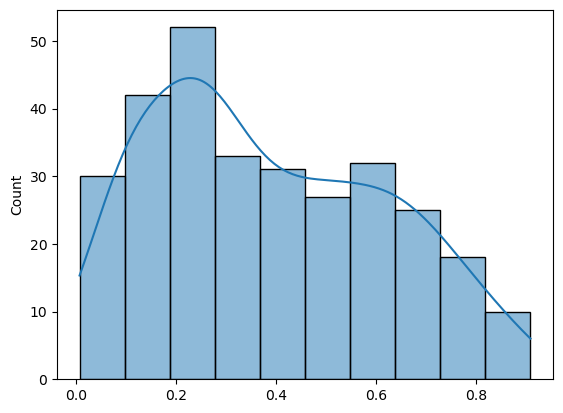

In [149]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_test_pred_proba,
                            y_test.shape[0]),
             kde = True)

Summary
- The best model is 1 predictor (`foreign_worker`) with recall score of 0.98
- After model selection, I decided to use the best model with 12 predictors (according to Naem Shidiqi book, scorecard needs to have 8-15 predictors)
- 12 predictors model is chosen because it has the best recall score among 8-15 predictors model 
- The predictors are: 'foreign_worker', 'other_parties', 'num_dependents', 'job', 'savings_status', 'installment_commitment', 'own_telephone', 'residence_since', 'checking_status', 'credit_amount_bin', 'credit_history', 'duration_bin'
- Recall score from test set is `0.58`:
    - This means model can only predict 58% of "bad" credit
    - This score is bad for a model



#### 4.6. Model Adjustment

Because model with 12 predictors have bad performance on test set, we will try other model

In [150]:
# Recall table between 8-15 predictors
more_predictors = forward_models.loc[8:15]
more_predictors = more_predictors.sort_values(by='Recall', ascending=False)
more_predictors

,Predictors,Recall
12,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16]",0.766667
14,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10, 6]",0.766667
15,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10,...",0.766667
13,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10]",0.761905
11,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1]",0.747619
8,"[15, 7, 13, 12, 3, 5, 14, 8]",0.738095
10,"[15, 7, 13, 12, 3, 5, 14, 8, 0, 17]",0.738095
9,"[15, 7, 13, 12, 3, 5, 14, 8, 0]",0.723810


- Model with 14 and 15 predictors have the same recall score as 12 model
- We will try model with 14 predictors

In [151]:
# Find the best Recall score
best_idx = 14
best_recall = more_predictors['Recall'].loc[best_idx]
best_predictors = more_predictors['Predictors'].loc[best_idx]

# Print the summary
print('Best index            :', best_idx)
print('Best Recall           :', best_recall)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(raw_train.columns[best_predictors].tolist())

Best index            : 14
Best Recall           : 0.7666666666666666
Best predictors (idx) : [15, 7, 13, 12, 3, 5, 14, 8, 0, 17, 1, 16, 10, 6]
Best predictors       :
['foreign_worker', 'other_parties', 'num_dependents', 'job', 'savings_status', 'installment_commitment', 'own_telephone', 'residence_since', 'checking_status', 'credit_amount_bin', 'credit_history', 'duration_bin', 'other_payment_plans', 'personal_status']


In [152]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(penalty = 'none',
                                class_weight = 'balanced')
best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced', penalty='none')

Get model parameter estimates

In [153]:
best_model_intercept = pd.DataFrame({'Characteristic': 'Intercept',
                                     'Estimate': best_model.intercept_})
best_model_intercept

,Characteristic,Estimate
0,Intercept,-0.01284


In [154]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Characteristic':  best_model_params,
                                 'Estimate':        np.reshape(best_model.coef_,
                                                               len(best_predictors))})

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0,
                               ignore_index = True)

best_model_summary

,Characteristic,Estimate
0,Intercept,-0.012840
1,foreign_worker,-1.379679
2,other_parties,-1.390768
3,num_dependents,-0.581430
4,job,-0.328764
5,savings_status,-0.860550
6,installment_commitment,-1.942521
7,own_telephone,-1.508237
8,residence_since,-1.876035
9,checking_status,-0.959968


##### 4.6.1. Adjusted Model Performance

Predict on train data

In [155]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.7714285714285715

In [157]:
# Using method sklearn.metrics.roc_curve
from sklearn import metrics

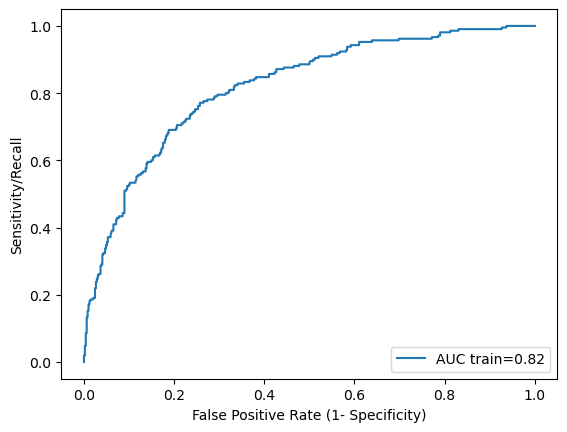

In [158]:
# Predict probability of default on X_train
y_train_pred_proba = best_model.predict_proba(X_train_best)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr, tpr, threshold = metrics.roc_curve(y_true = y_train,
                                        y_score = y_train_pred_proba[:,1])

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc_train = metrics.roc_auc_score(y_true = y_train,
                                  y_score = y_train_pred_proba[:,1])
auc_train = round(auc_train, 2)

# Plot ROC and its AUC
plt.plot(fpr,
         tpr,
         label = "AUC train="+str(auc_train))

plt.ylabel("Sensitivity/Recall")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

Predict on Test data

In [159]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]

# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)
y_test_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [160]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.6

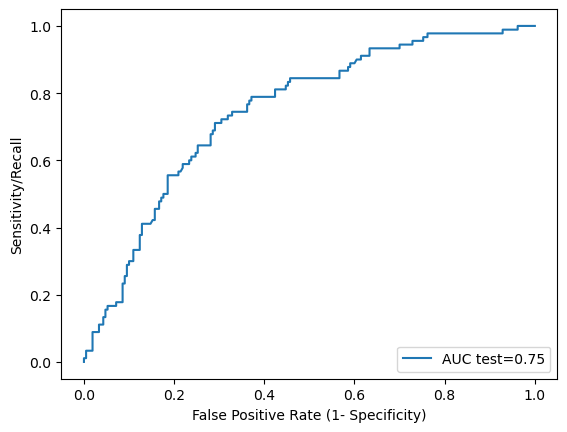

In [161]:
# Predict probability of default on X_test
y_test_pred_proba = best_model.predict_proba(X_test_best)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr_, tpr_, threshold_ = metrics.roc_curve(y_true = y_test,
                                           y_score = y_test_pred_proba[:,1])

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc_test = metrics.roc_auc_score(y_true = y_test,
                                 y_score = y_test_pred_proba[:,1])
auc_test = round(auc_test, 2)

# Plot ROC and its AUC
plt.plot(fpr_,
         tpr_,
         label = "AUC test="+str(auc_test))

plt.ylabel("Sensitivity/Recall")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

Summary:
- Adjusted model performance still bad, recall is only 0.6 -> only 2% improvement than previous model
- AUC score is good on the train set (0.86) but worse in test set (0.74)

### 5. Scaling

#### 5.1. Create Scorecard

In [162]:
# Define Factor and Offset
factor = 20/np.log(2)
offset = 300-(factor*np.log(30))

print(f"Offset = {offset:.2f}")
print(f"Factor = {factor:.2f}")

Offset = 201.86
Factor = 28.85


In [163]:
# Define n = number of characteristics
n = len(best_predictors)

# Define b0
b0 = best_model.intercept_[0]

print(f"n = {n}")
print(f"b0 = {b0:.4f}")

n = 14
b0 = -0.0128


In [181]:
# Adjust characteristic name in best_model_summary_table
for col in best_model_summary['Characteristic']:
  
  bin_col = col
  best_model_summary.replace(col, bin_col, inplace = True)


# Merge tables to get beta_i for each characteristic
scorecards = pd.merge(left = WOE_table,
                      right = best_model_summary,
                      how = 'inner',
                      on = ['Characteristic'])

scorecards.head()

,Characteristic,Attribute,WOE,Estimate
0,duration_bin,"(3.999, 12.0]",0.408059,-0.529720
1,duration_bin,"(12.0, 18.0]",0.021740,-0.529720
2,duration_bin,"(18.0, 24.0]",0.068993,-0.529720
3,duration_bin,"(24.0, 72.0]",-0.580669,-0.529720
4,credit_amount_bin,"(249.999, 1336.0]",-0.093526,-0.864906


In [183]:
# Define beta and WOE
beta = scorecards['Estimate']
WOE = scorecards['WOE']

# Calculate the score point for each attribute
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))
scorecards['Points'] = scorecards['Points'].astype('int')

scorecards

,Characteristic,Attribute,WOE,Estimate,Points
0,duration_bin,"(3.999, 12.0]",0.408059,-0.529720,20
1,duration_bin,"(12.0, 18.0]",0.021740,-0.529720,14
2,duration_bin,"(18.0, 24.0]",0.068993,-0.529720,15
3,duration_bin,"(24.0, 72.0]",-0.580669,-0.529720,5
4,credit_amount_bin,"(249.999, 1336.0]",-0.093526,-0.864906,12
5,credit_amount_bin,"(1336.0, 2290.0]",0.435097,-0.864906,25
6,credit_amount_bin,"(2290.0, 3965.25]",0.369097,-0.864906,23
7,credit_amount_bin,"(3965.25, 18424.0]",-0.582911,-0.864906,0
8,checking_status,0<=X<200,-0.380924,-0.959968,3
9,checking_status,>=200,0.433636,-0.959968,26


In [184]:
# Calculate the min and max points for each characteristic
grouped_char = scorecards.groupby('Characteristic')
grouped_points = grouped_char['Points'].agg(['min', 'max'])
grouped_points

,min,max
Characteristic,,
checking_status,-7,46
credit_amount_bin,0,25
credit_history,-13,33
duration_bin,5,20
foreign_worker,13,58
installment_commitment,8,21
job,10,14
num_dependents,13,18
other_parties,-12,53


In [185]:
# Calculate the min and max score from the scorecards
total_points = grouped_points.sum()
min_score = total_points['min']
max_score = total_points['max']

print(f"The lowest credit score = {min_score}")
print(f"The highest credit score = {max_score}")

The lowest credit score = 43
The highest credit score = 428


#### 5.2. Predict Credit Score

In [240]:
# Define scorecard predictors to a list
input_predictors = raw_train.columns[best_predictors].tolist()
input_predictors

['foreign_worker',
 'other_parties',
 'num_dependents',
 'job',
 'savings_status',
 'installment_commitment',
 'own_telephone',
 'residence_since',
 'checking_status',
 'credit_amount_bin',
 'credit_history',
 'duration_bin',
 'other_payment_plans',
 'personal_status']

In [244]:
# Define new train data with only 14 predictors from Scorecard/adjusted model
train_scorecard = raw_train[input_predictors]

# Check
train_scorecard.head(3)


,foreign_worker,other_parties,num_dependents,job,savings_status,installment_commitment,own_telephone,residence_since,checking_status,credit_amount_bin,credit_history,duration_bin,other_payment_plans,personal_status
328,yes,none,1 dependent,skilled,<100,4,none,2,>=200,"(3965.25, 18424.0]",existing paid,"(24.0, 72.0]",none,male single
891,yes,none,1 dependent,skilled,<100,4,yes,4,no checking,"(1336.0, 2290.0]",critical/other existing credit,"(12.0, 18.0]",none,male single
255,yes,none,1 dependent,unskilled resident,no known savings,1,none,1,0<=X<200,"(3965.25, 18424.0]",delayed previously,"(24.0, 72.0]",none,male single


In [245]:
# Define new train data with only 14 predictors from Scorecard/adjusted model
test_scorecard = raw_test[input_predictors]

# Check
test_scorecard.head(3)

,foreign_worker,other_parties,num_dependents,job,savings_status,installment_commitment,own_telephone,residence_since,checking_status,credit_amount_bin,credit_history,duration_bin,other_payment_plans,personal_status
80,yes,none,1 dependent,skilled,no known savings,1,yes,1,no checking,"(4029.25, 15857.0]",existing paid,"(18.0, 24.0]",none,female div/dep/mar
157,yes,none,1 dependent,unskilled resident,<100,4,none,1,<0,"(338.999, 1423.5]",all paid,"(4.999, 12.0]",bank,male mar/wid
65,yes,none,2 dependents,skilled,no known savings,4,yes,4,no checking,"(4029.25, 15857.0]",existing paid,"(24.0, 60.0]",none,male single


In [186]:
# Function to generate the points map dictionary
def get_points_map_dict(scorecards):

    # Initialize the dictionary
    points_map_dict = {}
    points_map_dict['Missing'] = {}
    unique_char = set(scorecards['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (scorecards
                            [scorecards['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'Points']])               # Then select the attribute & WOE

        # Get the mapping
        points_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            points = current_data.loc[idx, 'Points']

            if attribute == 'Missing':
                points_map_dict['Missing'][char] = points
            else:
                points_map_dict[char][attribute] = points
                points_map_dict['Missing'][char] = np.nan

    return points_map_dict


In [187]:
# Generate the points map dict
points_map_dict = get_points_map_dict(scorecards = scorecards)
points_map_dict

{'Missing': {'personal_status': nan,
  'job': nan,
  'residence_since': nan,
  'foreign_worker': nan,
  'num_dependents': nan,
  'other_parties': nan,
  'credit_amount_bin': nan,
  'own_telephone': nan,
  'savings_status': nan,
  'duration_bin': nan,
  'other_payment_plans': nan,
  'installment_commitment': nan,
  'checking_status': nan,
  'credit_history': nan},
 'personal_status': {'female div/dep/mar': 6,
  'male div/sep': 10,
  'male mar/wid': 22,
  'male single': 18},
 'job': {'high qualif/self emp/mgmt': 13,
  'skilled': 14,
  'unemp/unskilled non res': 10,
  'unskilled resident': 14},
 'residence_since': {1: 31, 2: 4, 3: 25, 4: 13},
 'foreign_worker': {'no': 58, 'yes': 13},
 'num_dependents': {'1 dependent': 13, '2 dependents': 18},
 'other_parties': {'co applicant': -12, 'guarantor': 53, 'none': 14},
 'credit_amount_bin': {Interval(249.999, 1336.0, closed='right'): 12,
  Interval(1336.0, 2290.0, closed='right'): 25,
  Interval(2290.0, 3965.25, closed='right'): 23,
  Interval(39

In [246]:
input = {
    'foreign_worker': 'yes',
    'num_dependents': '1 dependent',
    'job': 'skilled',
    'savings_status': '<100',
    'installment_commitment': 1,
    'own_telephone': 'yes',
    'residence_since': 2,
    'checking_status': 'no checking',
    'credit_amount_bin': 5000,
    'credit_history': 'existing paid',
    'duration_bin': 36,
    'other_payment_plans' : 'none',
    'personal_status' : 'male single'

}

In [247]:
def transform_points(raw_data, points_map_dict, num_cols):

    points_data = raw_data.copy()

    # Map the data
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].map(points_map_dict[map_col])

    # Map the data if there is a missing value or out of range value
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].fillna(value=points_map_dict['Missing'][map_col])

    return points_data

In [248]:
input_table = pd.DataFrame(input, index=[0])
input_points = transform_points(raw_data = input_table,
                                points_map_dict = points_map_dict,
                                num_cols = num_columns)

input_points

,foreign_worker,num_dependents,job,savings_status,installment_commitment,own_telephone,residence_since,checking_status,credit_amount_bin,credit_history,duration_bin,other_payment_plans,personal_status
0,13,13,14,7,21,19,4,46,0,10,5,18,18


In [193]:
# Function to predict the credit score
def predict_score(raw_data, cutoff_score):

    # Transform raw input values into score points
    points = transform_points(raw_data = raw_data,
                              points_map_dict = points_map_dict,
                              num_cols = num_columns)

    # Caculate the score as the total points
    score = int(points.sum(axis=1))

    print(f"Credit Score : ", score)

    if score > cutoff_score:
        print("Recommendation : APPROVE")
    else:
        print("Recommendation : REJECT")

    return score

In [249]:
input_score = predict_score(raw_data = input_table,
                            cutoff_score = 150)

Credit Score :  188
Recommendation : APPROVE


Predict Score on Train set

In [250]:
# Transform the raw values in X_train into points
train_points = transform_points(raw_data = train_scorecard,
                                points_map_dict = points_map_dict,
                                num_cols = num_columns)

train_points.head()

,foreign_worker,other_parties,num_dependents,job,savings_status,installment_commitment,own_telephone,residence_since,checking_status,credit_amount_bin,credit_history,duration_bin,other_payment_plans,personal_status
328,13,14,13,14,7,8,11,4,26.0,0,10,5,18,18
891,13,14,13,14,7,8,19,13,46.0,25,33,14,18,18
255,13,14,13,14,29,21,11,31,3.0,0,12,5,18,18
243,13,14,13,14,7,18,11,4,46.0,12,33,20,18,6
492,13,14,13,14,12,21,11,31,46.0,12,33,20,18,6


In [251]:
# Calculate the total score
train_points['Score'] = train_points.sum(axis=1).astype(int)

train_points[['foreign_worker', 'Score']].head()

,foreign_worker,Score
328,13,161
891,13,255
255,13,202
243,13,229
492,13,264


<AxesSubplot:xlabel='Score', ylabel='Count'>

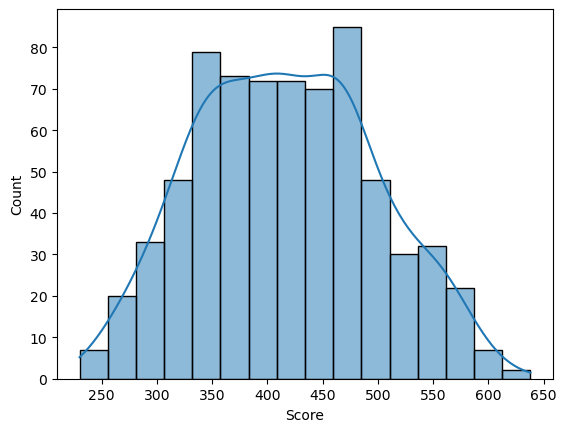

In [234]:
# Distribution plot of predicted score
sns.histplot(x = train_points['Score'],
             kde = True)

Predict Score on Test set

In [252]:
# Transform the raw values in X_train into points
test_points = transform_points(raw_data = test_scorecard,
                               points_map_dict = points_map_dict,
                               num_cols = num_columns)

test_points.head()

,foreign_worker,other_parties,num_dependents,job,savings_status,installment_commitment,own_telephone,residence_since,checking_status,credit_amount_bin,credit_history,duration_bin,other_payment_plans,personal_status
80,13,14,13,14,29,21,19,31,46.0,NaN,10,15.0,18,6
157,13,14,13,14,7,8,11,31,NaN,NaN,-12,NaN,0,22
65,13,14,18,14,29,8,19,13,46.0,NaN,10,NaN,18,18
489,13,53,13,14,7,20,11,25,46.0,NaN,10,NaN,18,18
804,13,14,13,10,29,21,11,4,3.0,NaN,10,NaN,18,6


In [254]:
# Calculate the total score
test_points['Score'] = test_points.sum(axis=1).astype(int)

test_points[['foreign_worker', 'Score']].head()

,foreign_worker,Score
80,13,498
157,13,242
65,13,440
489,13,496
804,13,304


<AxesSubplot:xlabel='Score', ylabel='Count'>

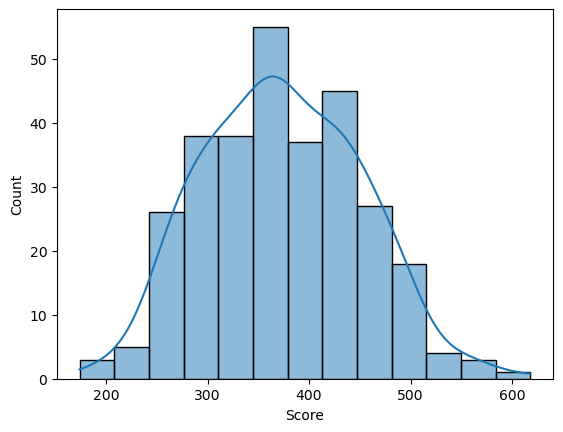

In [255]:
# Distribution plot of predicted score
sns.histplot(x = test_points['Score'],
             kde = True)

#### 5.3. Setting Cutoff

Estimate expected cutoff rate

In [256]:
cutoff_list = []
approval_rate_list = []

for cutoff in range (int(min_score), int(max_score)):

  cutoff_list.append(cutoff)

  approve_counts = len(train_points[train_points['Score'] >= cutoff])
  n_sample = len(train_points)

  approval_rate = approve_counts/n_sample

  approval_rate_list.append(approval_rate)

approval_rate_table = pd.DataFrame({'Cutoff' : cutoff_list,
                                    'Expected Approval Rate' : approval_rate_list})

approval_rate_table

,Cutoff,Expected Approval Rate
0,43,1.0
1,44,1.0
2,45,1.0
3,46,1.0
4,47,1.0
...,...,...
380,423,0.0
381,424,0.0
382,425,0.0
383,426,0.0


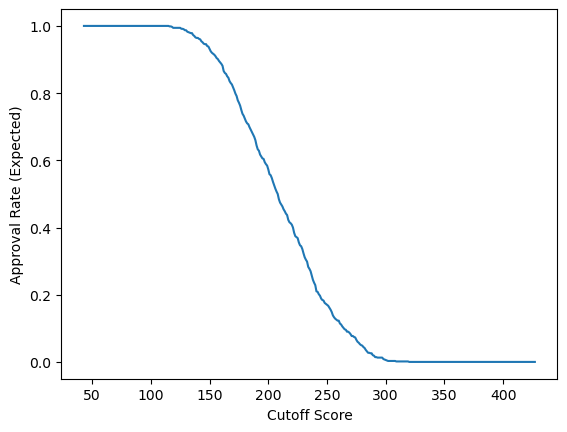

In [257]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

plt.xlabel('Cutoff Score')
plt.ylabel('Approval Rate (Expected)')
plt.show()

Estimate expected Bad rate

In [258]:
cutoff_list = []
bad_rate_list = []

for cutoff in range (int(min_score), int(max_score)):

  cutoff_list.append(cutoff)

  bad_counts = len(train_points[train_points['Score'] < cutoff])
  n_sample = len(train_points)

  bad_rate = bad_counts/n_sample

  bad_rate_list.append(bad_rate)

bad_rate_table = pd.DataFrame({'Cutoff' : cutoff_list,
                               'Expected Bad Rate' : bad_rate_list})

bad_rate_table

,Cutoff,Expected Bad Rate
0,43,0.0
1,44,0.0
2,45,0.0
3,46,0.0
4,47,0.0
...,...,...
380,423,1.0
381,424,1.0
382,425,1.0
383,426,1.0


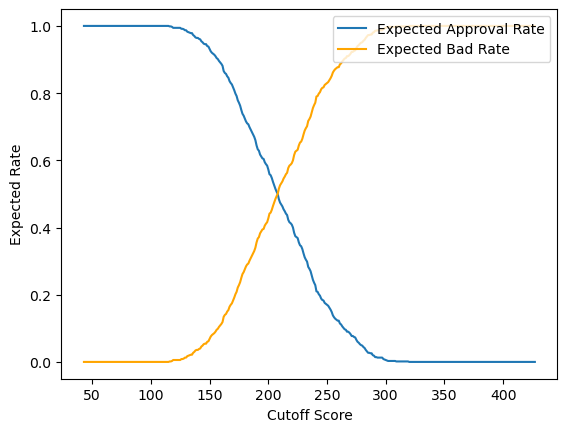

In [259]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

# Plot the expected bad rate
plt.plot(bad_rate_table['Cutoff'],
         bad_rate_table['Expected Bad Rate'],
         label = "Expected Bad Rate",
         color = 'orange')

plt.ylabel("Expected Rate")
plt.xlabel("Cutoff Score")
plt.legend(loc = 1)
plt.show()